In [1]:
# Importing all the necessary libraries
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



**NOTE - Please change the reading directory of the dataset in the below query as per your requirments**

In [2]:
# Reading dataset from local
df = pd.read_excel('application_data.xlsx')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Cleaning the missing data

# listing the null values columns having more than 30%
emptycol=df.isnull().sum()
emptycol=emptycol[emptycol.values>(0.3*len(emptycol))]
len(emptycol)

64

In [4]:
# Removing those 64 columns
emptycol = list(emptycol[emptycol.values>=0.3].index)
df.drop(labels=emptycol,axis=1,inplace=True)
print(len(emptycol))

64


So, there are 64 columns having null values greater than 30% in the dataset

In [5]:
# Checking the columns having less null percentage

df.isnull().sum()/len(df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003882
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000
FLAG_PHONE                     0.000000
FLAG_EMAIL                     0.000000


Since this column is having an outlier which is very large it will be inappropriate to fill those missing values with mean, 
Hence Median comes to rescue for this and we will fill those missing banks with median value

In [6]:
# Filling missing values with median
values=df['AMT_ANNUITY'].median()
df.loc[df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY']=values

In [7]:
# Searching for the column for null values
df.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL                     0
CNT_FAM_MEMBERS                2
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
REG_REGION

In [8]:
# Removing rows having null values greater than or equal to 30%
emptyrow=df.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>0.3*len(df)].index)
df.drop(labels=emptyrow,axis=0,inplace=True)
print(len(emptyrow))

0


In [9]:
# We will remove unwanted columns from this dataset

unwanted=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df.drop(labels=unwanted,axis=1,inplace=True)

There are some columns where the value is mentioned as 'XNA' which means 'Not Available'. So we have to find the number of rows and columns and implement suitable techniques on them to fill those missing values or to delete them.

In [10]:
# let's find these categorical columns having these 'XNA' values
    
# For Gender column
df[df['CODE_GENDER']=='XNA'].shape


(4, 28)

In [11]:
# For Organization column
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(37093, 28)

So, there are 4 rows from Gender column and 37093 rows from Organization type column 

In [12]:
# Describing the Gender column to check the number of females and males
df['CODE_GENDER'].value_counts()

F      135513
M       70562
XNA         4
Name: CODE_GENDER, dtype: int64

Since, Female is having the majority and only 4 rows are having NA values, we can update those columns with Gender 'F' as there will be no impact on the dataset.

In [13]:
# Updating the column 'CODE_GENDER' with "F" for the dataset
df.loc[df['CODE_GENDER']=='XNA','CODE_GENDER']='F'
df['CODE_GENDER'].value_counts()

F    135517
M     70562
Name: CODE_GENDER, dtype: int64

In [14]:
# Describing the organization type column
df['ORGANIZATION_TYPE'].describe()

count                     206079
unique                        58
top       Business Entity Type 3
freq                       45888
Name: ORGANIZATION_TYPE, dtype: object

So, for column 'ORGANIZATION_TYPE', we have total count of 206079 rows of which 45888 rows are having 'XNA' values. Which means 18% of the column is having this values.
Hence if we drop the rows of total 45888, will not have any major impact on our dataset.

In [15]:
# Hence, dropping the rows of total 37093 have 'XNA' values in the organization type column

df=df.drop(df.loc[df['ORGANIZATION_TYPE']=='XNA'].index)
df[df['ORGANIZATION_TYPE']=='XNA'].shape

(0, 28)

In [16]:
# Casting all variable into numeric in the dataset

numeric_columns=['TARGET','CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                'DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY']

df[numeric_columns]=df[numeric_columns].apply(pd.to_numeric)

Now, Creating bins for continous variable categories column 'AMT_INCOME_TOTAL' and 'AMT_CREDIT'

In [17]:
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,-2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,-291,MONDAY,11,0,0,0,0,0,0,School
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,-2531,MONDAY,9,0,0,0,0,0,0,Government
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,-2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,-3458,THURSDAY,11,0,0,0,0,1,1,Religion


In [18]:
# Creating bins for Credit amount
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

df['AMT_INCOME_RANGE']=pd.cut(df['AMT_INCOME_TOTAL'],bins,labels=slot)

In [19]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

df['AMT_CREDIT_RANGE']=pd.cut(df['AMT_CREDIT'],bins=bins,labels=slots)

In [20]:
# Dividing the dataset into two dataset of  target=1(client with payment difficulties) and target=0(all other)

target0_df=df.loc[df["TARGET"]==0]
target1_df=df.loc[df["TARGET"]==1]

In [21]:
target0_df.sum()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\3651117061.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  target0_df.sum()


SK_ID_CURR                                                           33847640012
TARGET                                                                         0
NAME_CONTRACT_TYPE             Cash loansRevolving loansCash loansCash loansC...
CODE_GENDER                    FMFMMFMMFFMFMMFFFMFFMFMMMFFFMFFFMMFMFFFMFMMFFM...
FLAG_OWN_CAR                   NYNNNYYNNNYNYNNNNYYNYNNYNNNNYNNNNYNNNNNYNYYNNN...
FLAG_OWN_REALTY                NYYYYYYYYYNYYNYYYYYNNYYYYYYNNYNYYYYYYYNYYYNYYY...
CNT_CHILDREN                                                               76697
AMT_INCOME_TOTAL                                              27238471340.085003
AMT_CREDIT                                                         95193935244.0
AMT_ANNUITY                                                         4309706893.5
NAME_INCOME_TYPE               State servantWorkingWorkingWorkingState servan...
NAME_EDUCATION_TYPE            Higher educationSecondary / secondary specialS...
NAME_FAMILY_STATUS          

In [22]:
#target1_df.sum()

In [23]:
# Calculating Imbalance percentage
    
# Since the majority is target0 and minority is target1

round(len(target0_df)/len(target1_df),2)

10.5

**Univariate analysis for categories**

**Now, doing Categorical Univariate Analysis in logarithmic scale for target=0(client with no payment difficulties)**

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt 
def uniplot(df,col,title,hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams['axes.labelsize']=20
    plt.rcParams['axes.titlesize']=22
    plt.rcParams['axes.titlepad']=30
    
    temp= pd.Series(data=hue)
    fig, ax=plt.subplots()
    width= len(df[col].unique())+7+4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax=sns.countplot(data=df, x= col, order=df[col].value_counts().index, hue=hue, palette='magma')
    plt.show()

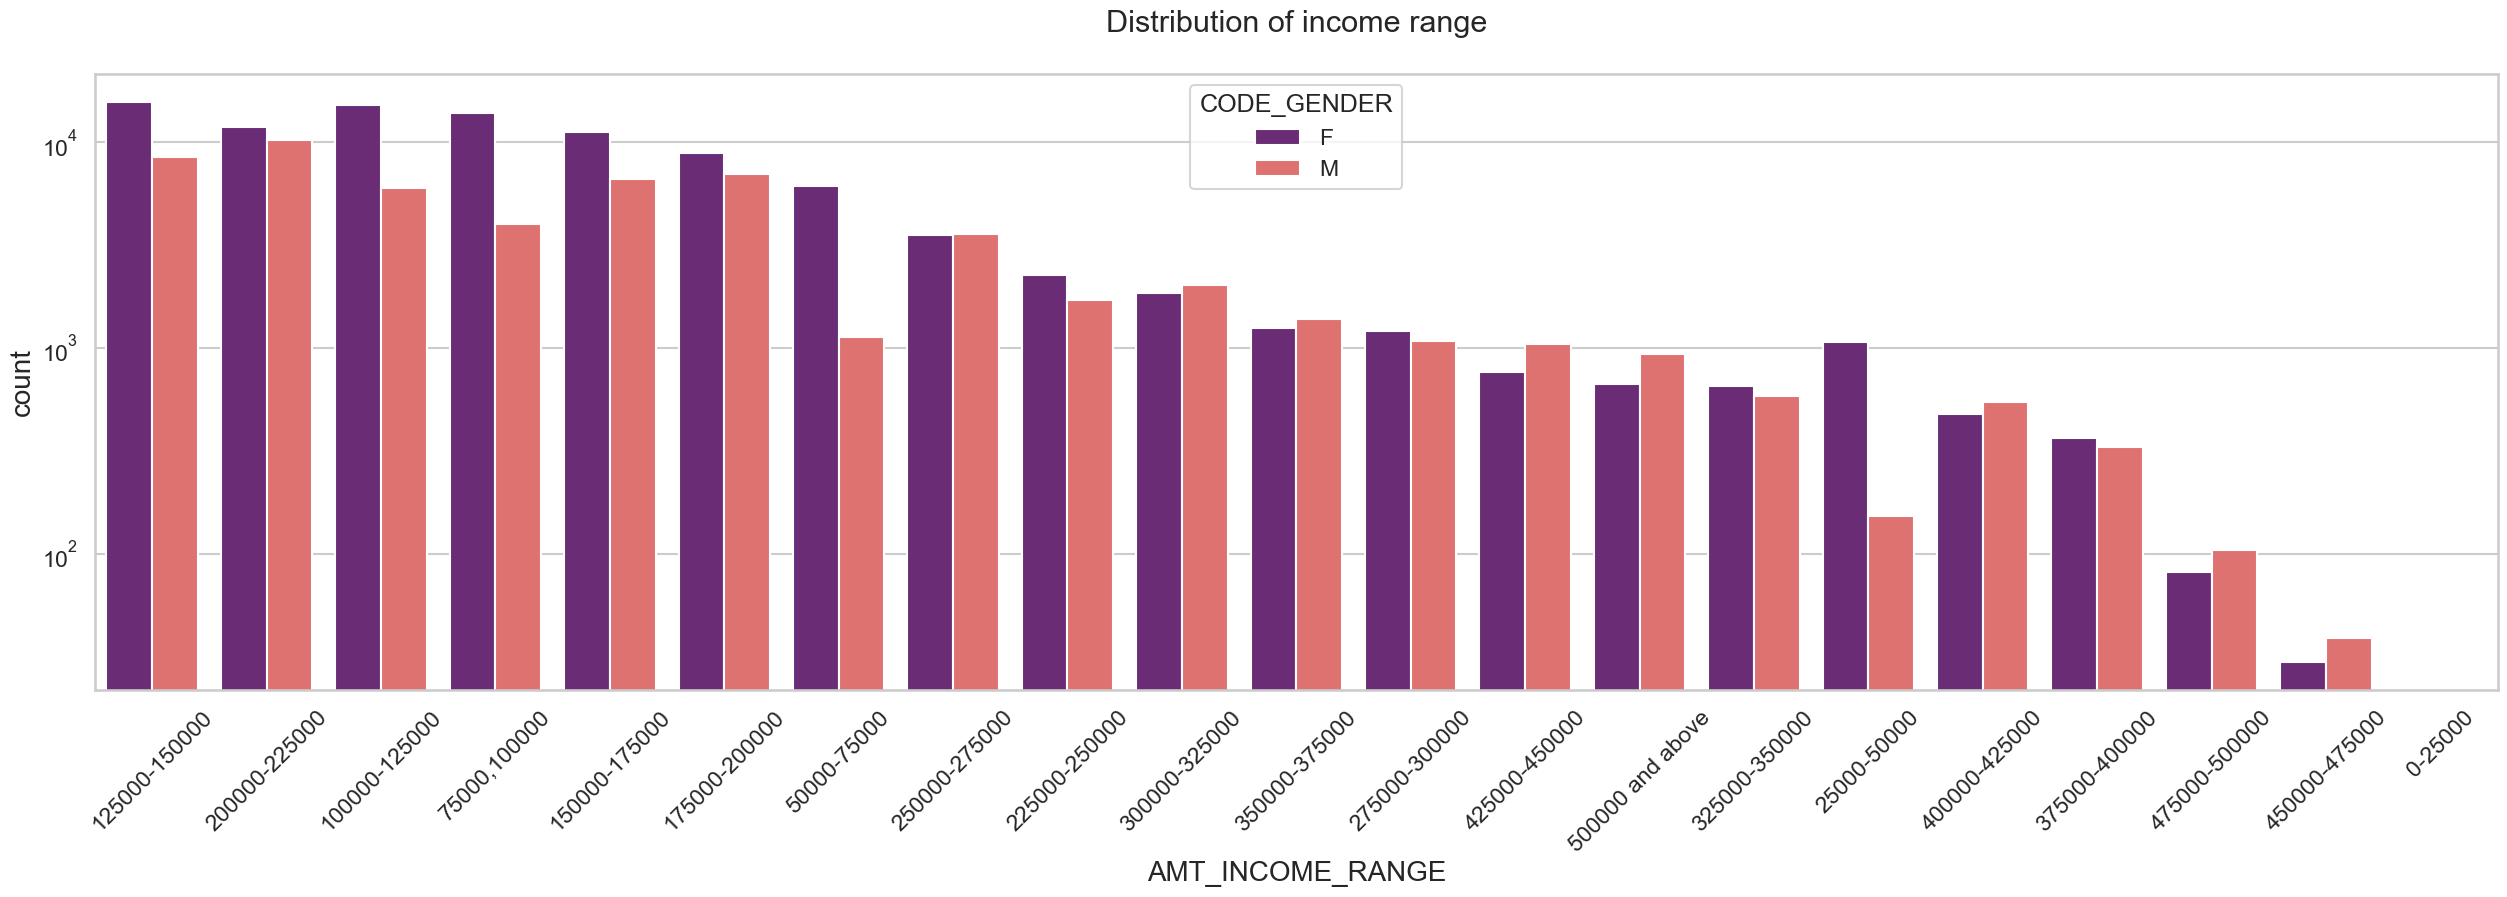

In [25]:
# PLotting for income range
uniplot(target0_df, col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Female counts are higher than male.
2. Income range from 125000 to 150000 is having more number of credits.
3. This graph show that females are more than male in having credits for that range.
4. Very less count for income range 450000 and above.

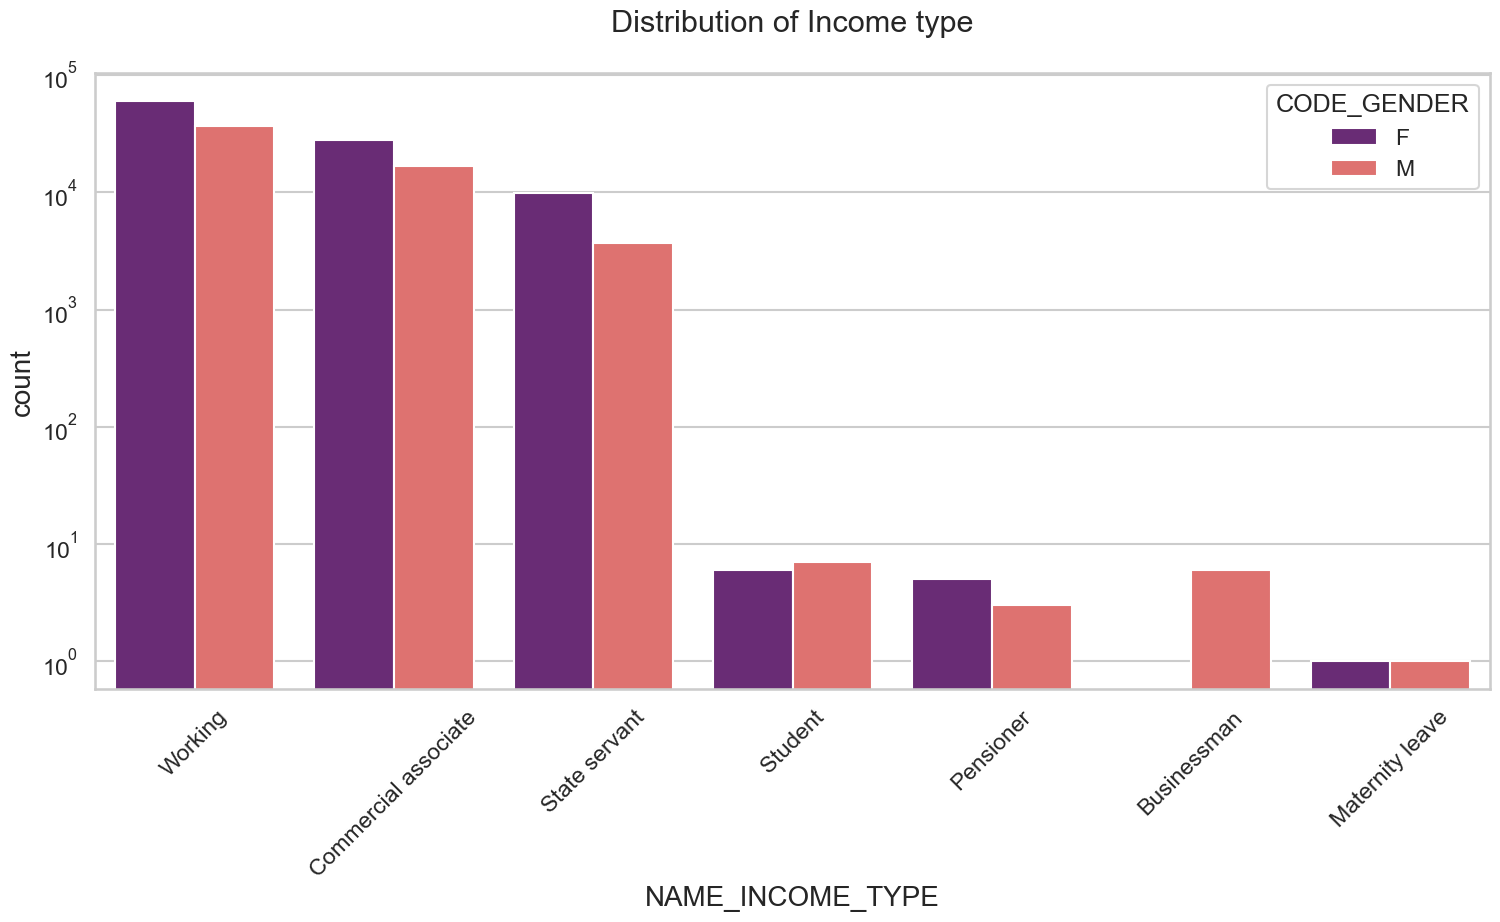

In [26]:
# Plotting for Income type
uniplot(target0_df,col='NAME_INCOME_TYPE',title='Distribution of Income type', hue='CODE_GENDER')


Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than others.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type ‘student’ ,’pensioner’, ‘Businessman’ and ‘Maternity leave’.

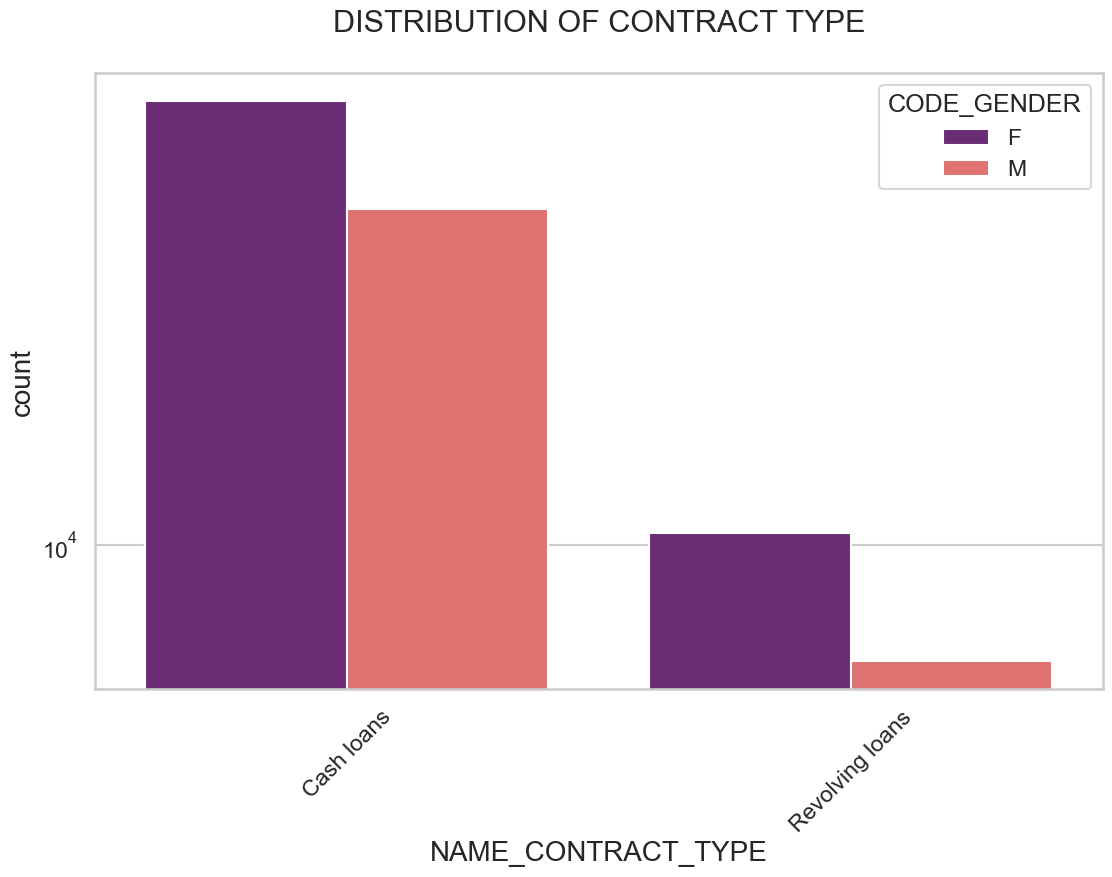

In [27]:
# Plotting for Contract type
uniplot(target0_df,col='NAME_CONTRACT_TYPE',title='DISTRIBUTION OF CONTRACT TYPE', hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.

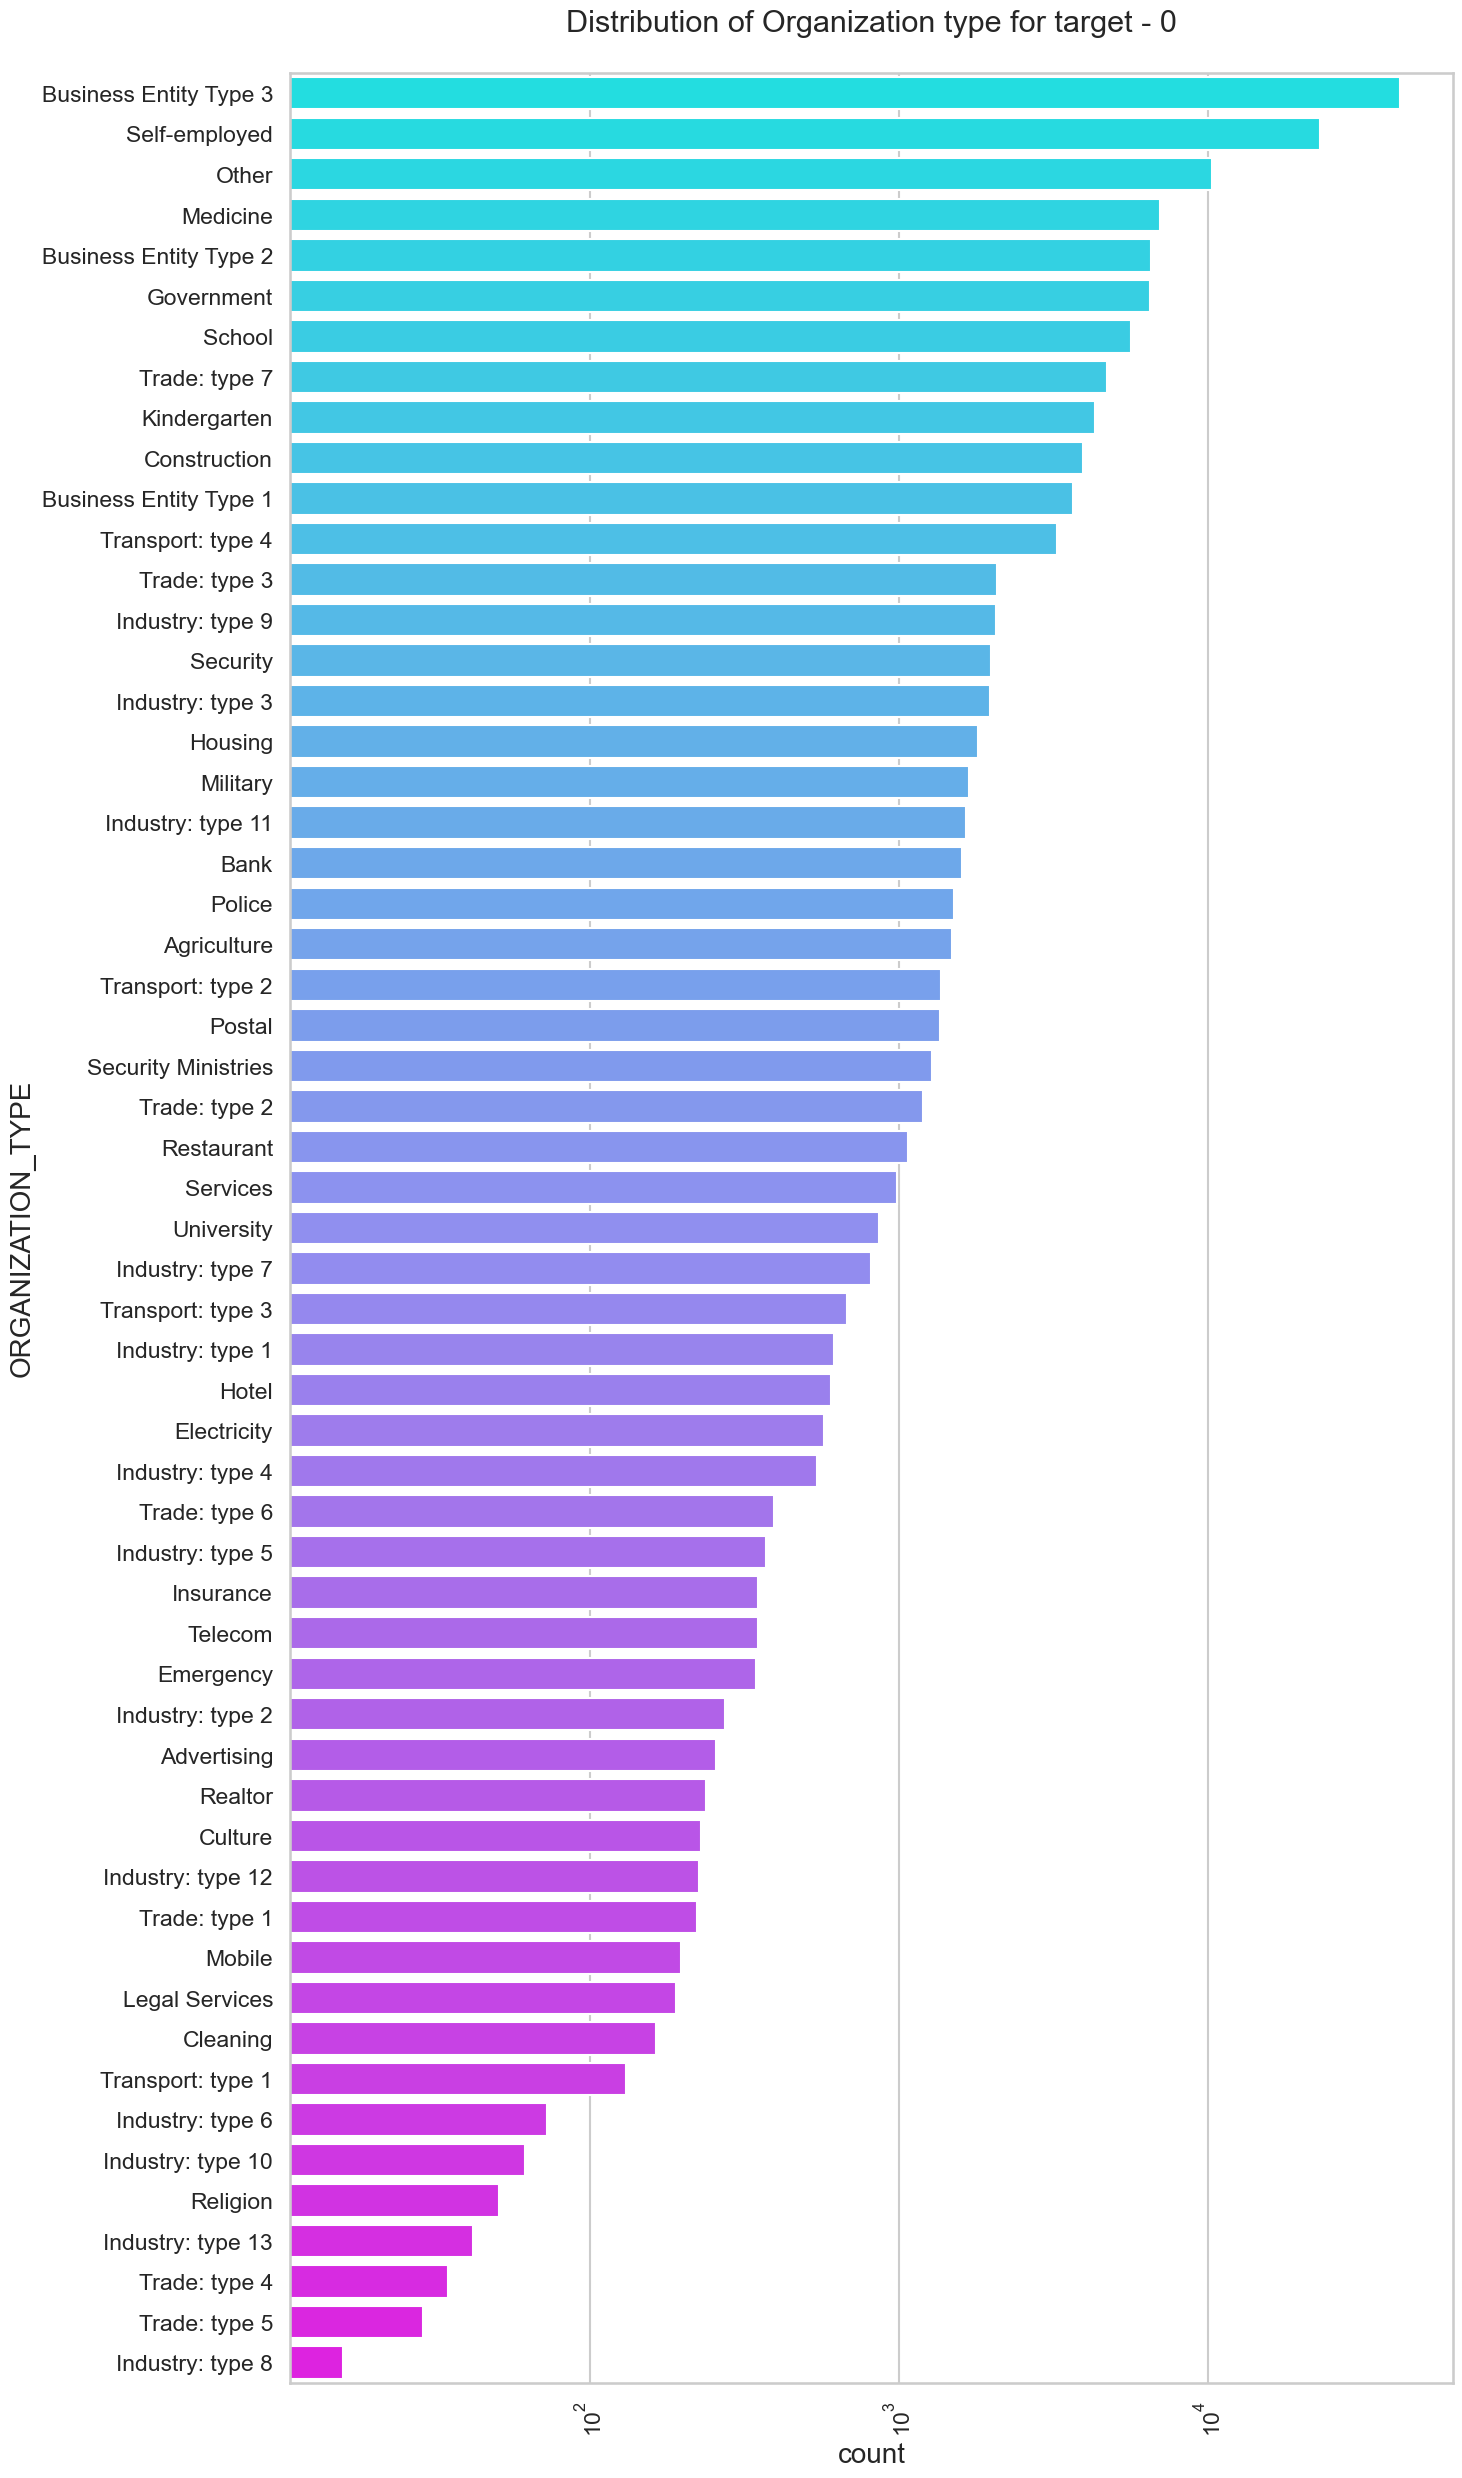

In [28]:
# Plotting for Organization type in logarithmic scale
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’,
   ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.


**Now, doing Categoroical Univariate Analysis in logarithmic scale for target=1(client with payment difficulties)**

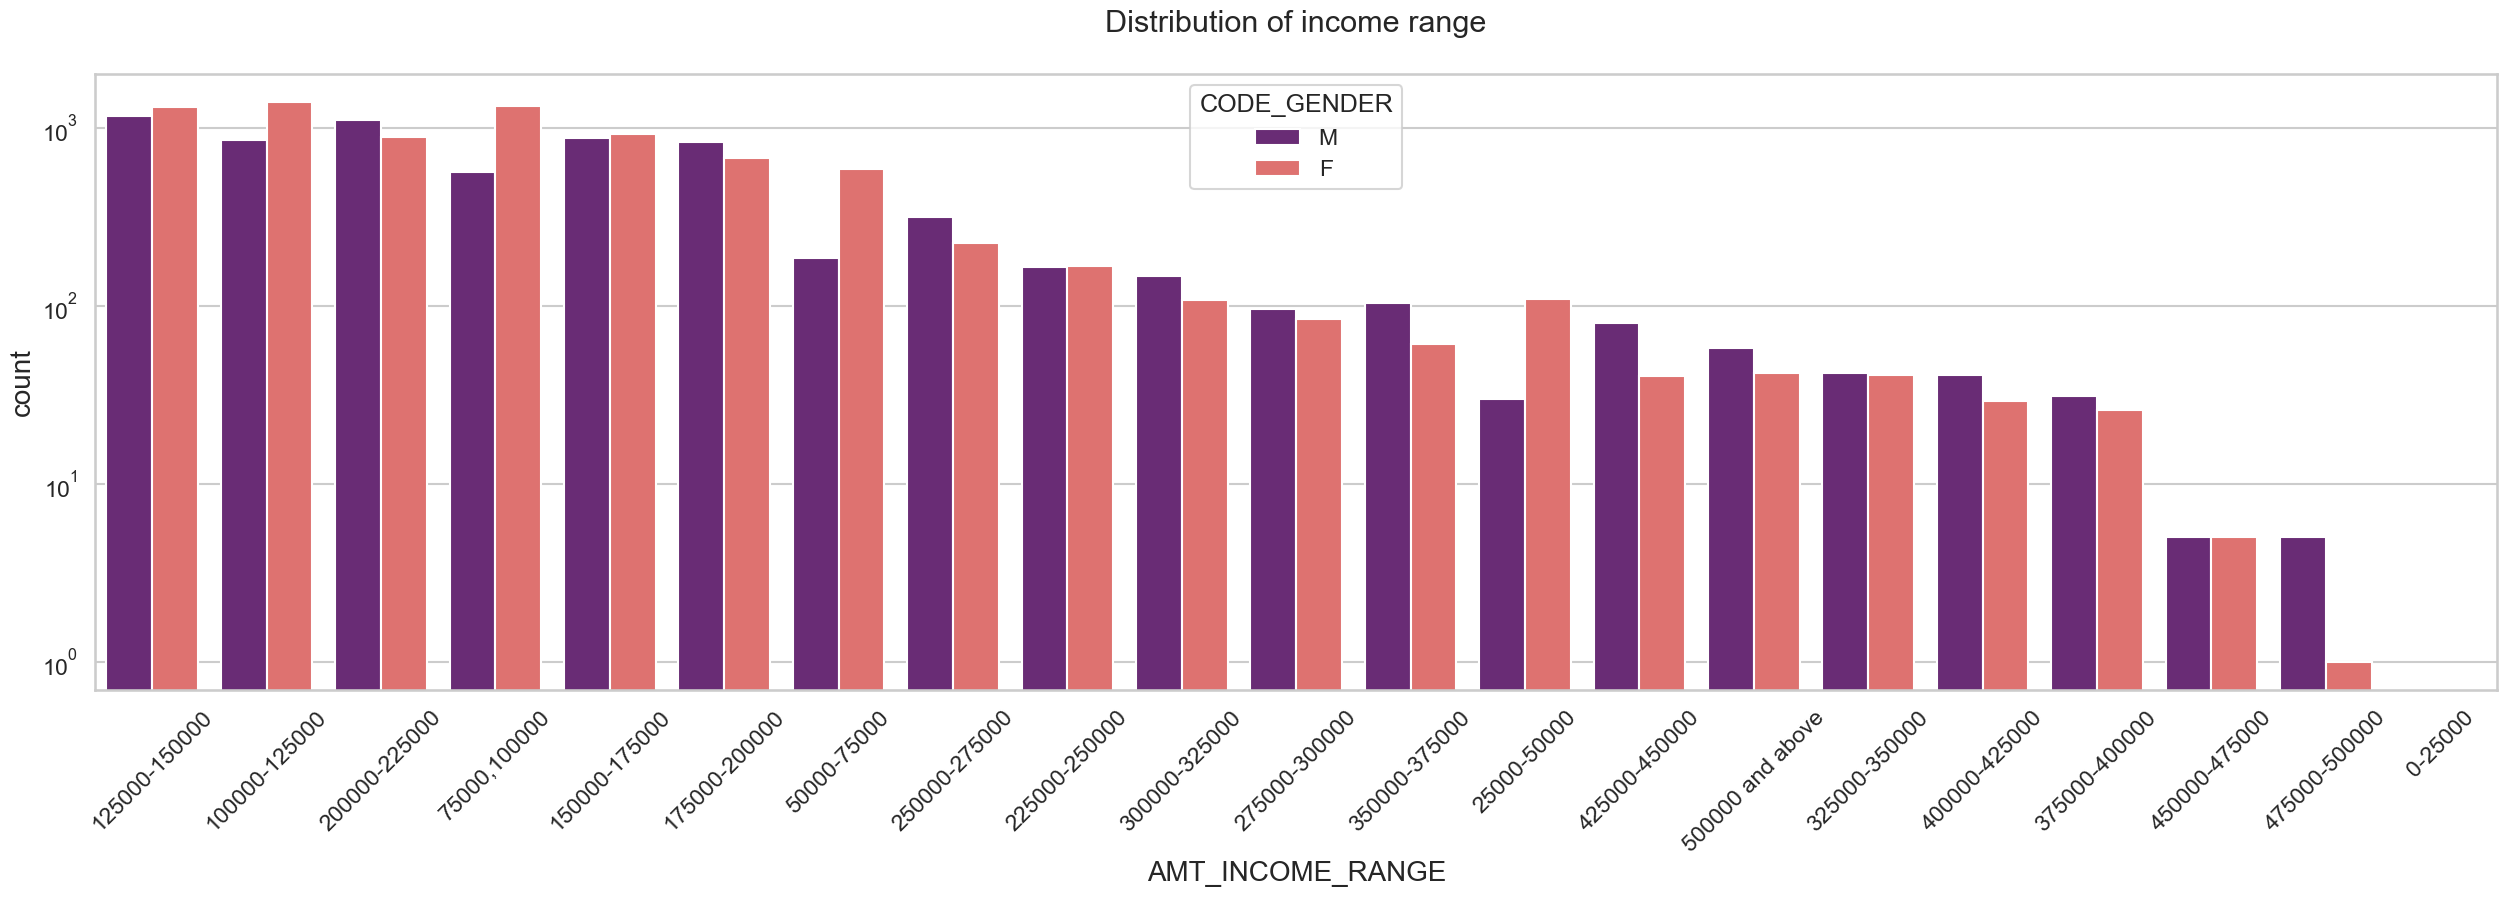

In [29]:
# PLotting for income range

uniplot(target1_df,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. Male counts are higher than female.
2. Income range from 125000 to 150000 is having more number of credits.
3. This graph show that males are more than female in having credits for that range.
4. Very less count for income range 475000 and above.


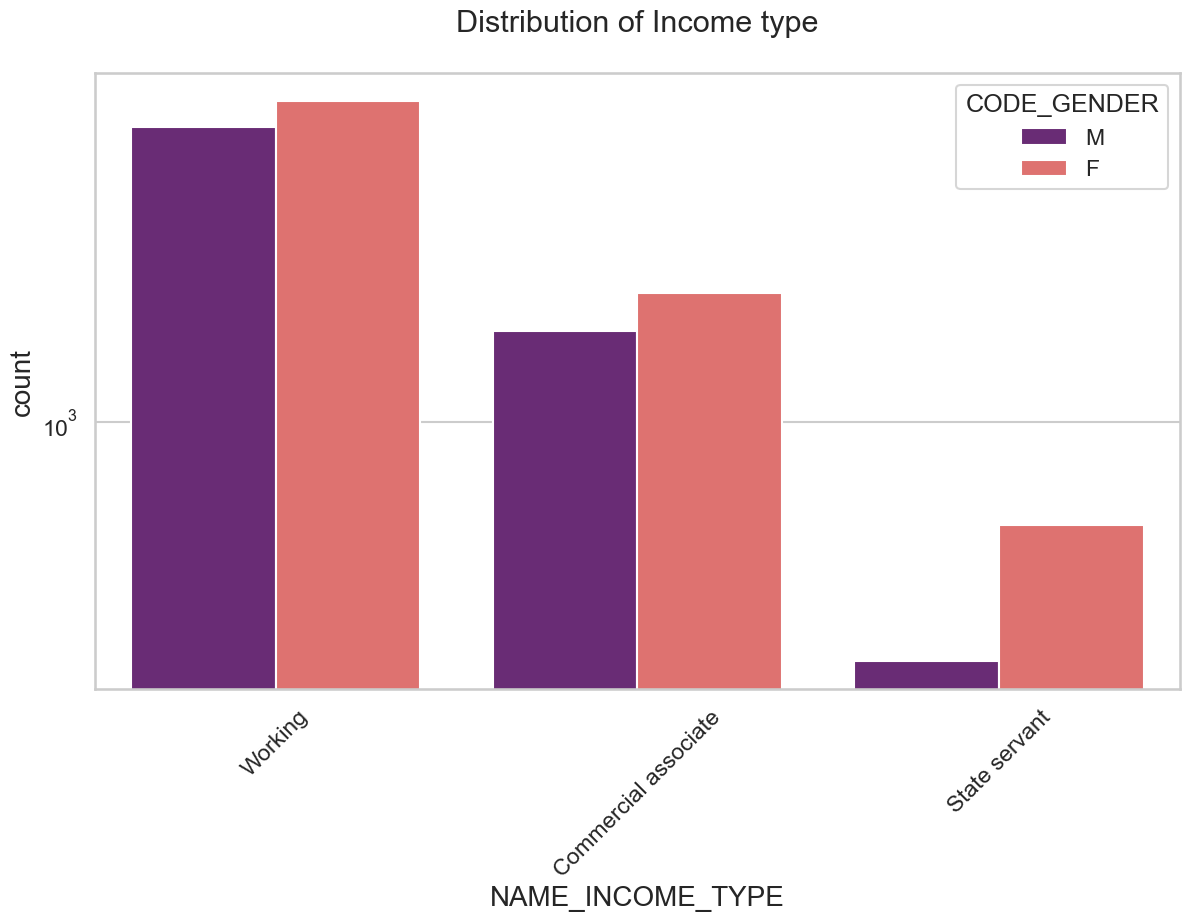

In [30]:
# Plotting for Income type
uniplot(target1_df,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For income type ‘working’, ’commercial associate’, and ‘State Servant’ the number of credits are higher than other i.e.   ‘Maternity leave.
2. For this Females are having more number of credits than male.
3. Less number of credits for income type  ‘Maternity leave’.
4. For type 1: There is no income type for ‘student’ , ’pensioner’ and ‘Businessman’ which means they don’t do any late payments.

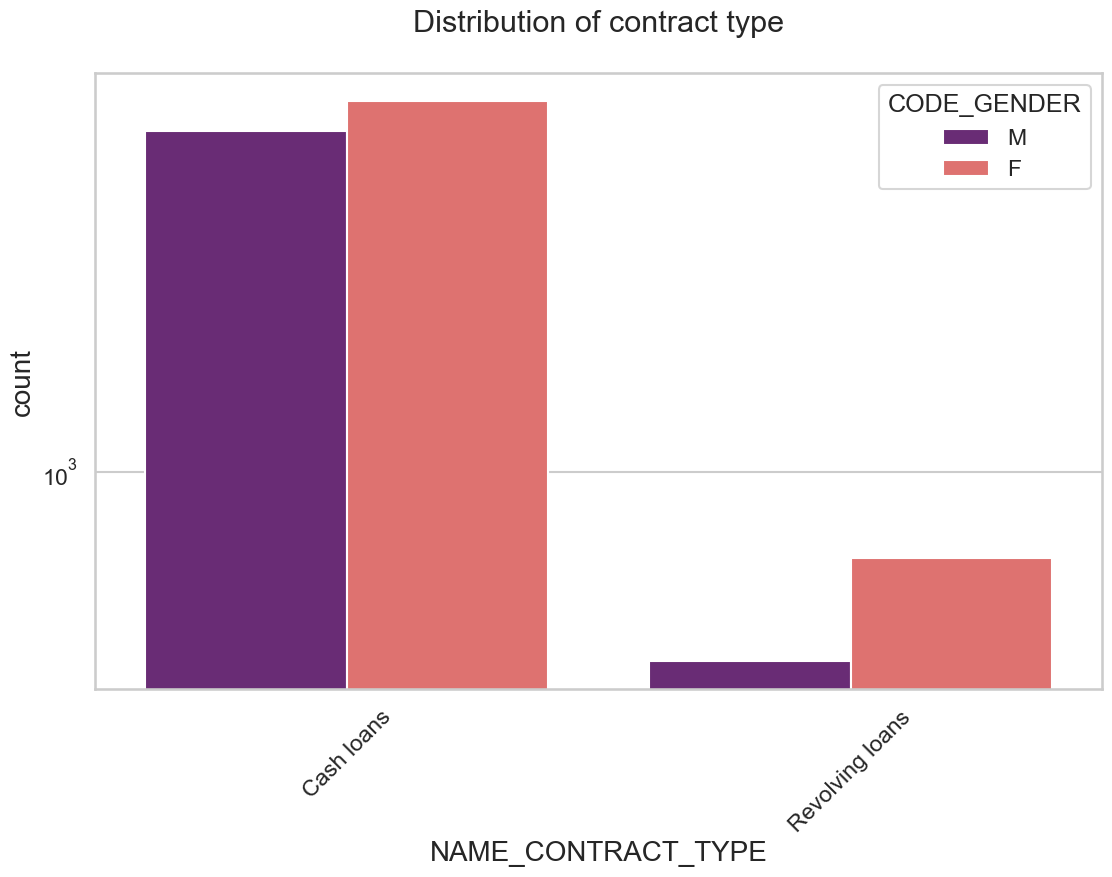

In [31]:
# Plotting for Contract type
uniplot(target1_df,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

Points to be concluded from the above graph.

1. For contract type ‘cash loans’ is having higher number of credits than ‘Revolving loans’ contract type.
2. For this also Female is leading for applying credits.
3. For type 1 : there is only Female Revolving loans.

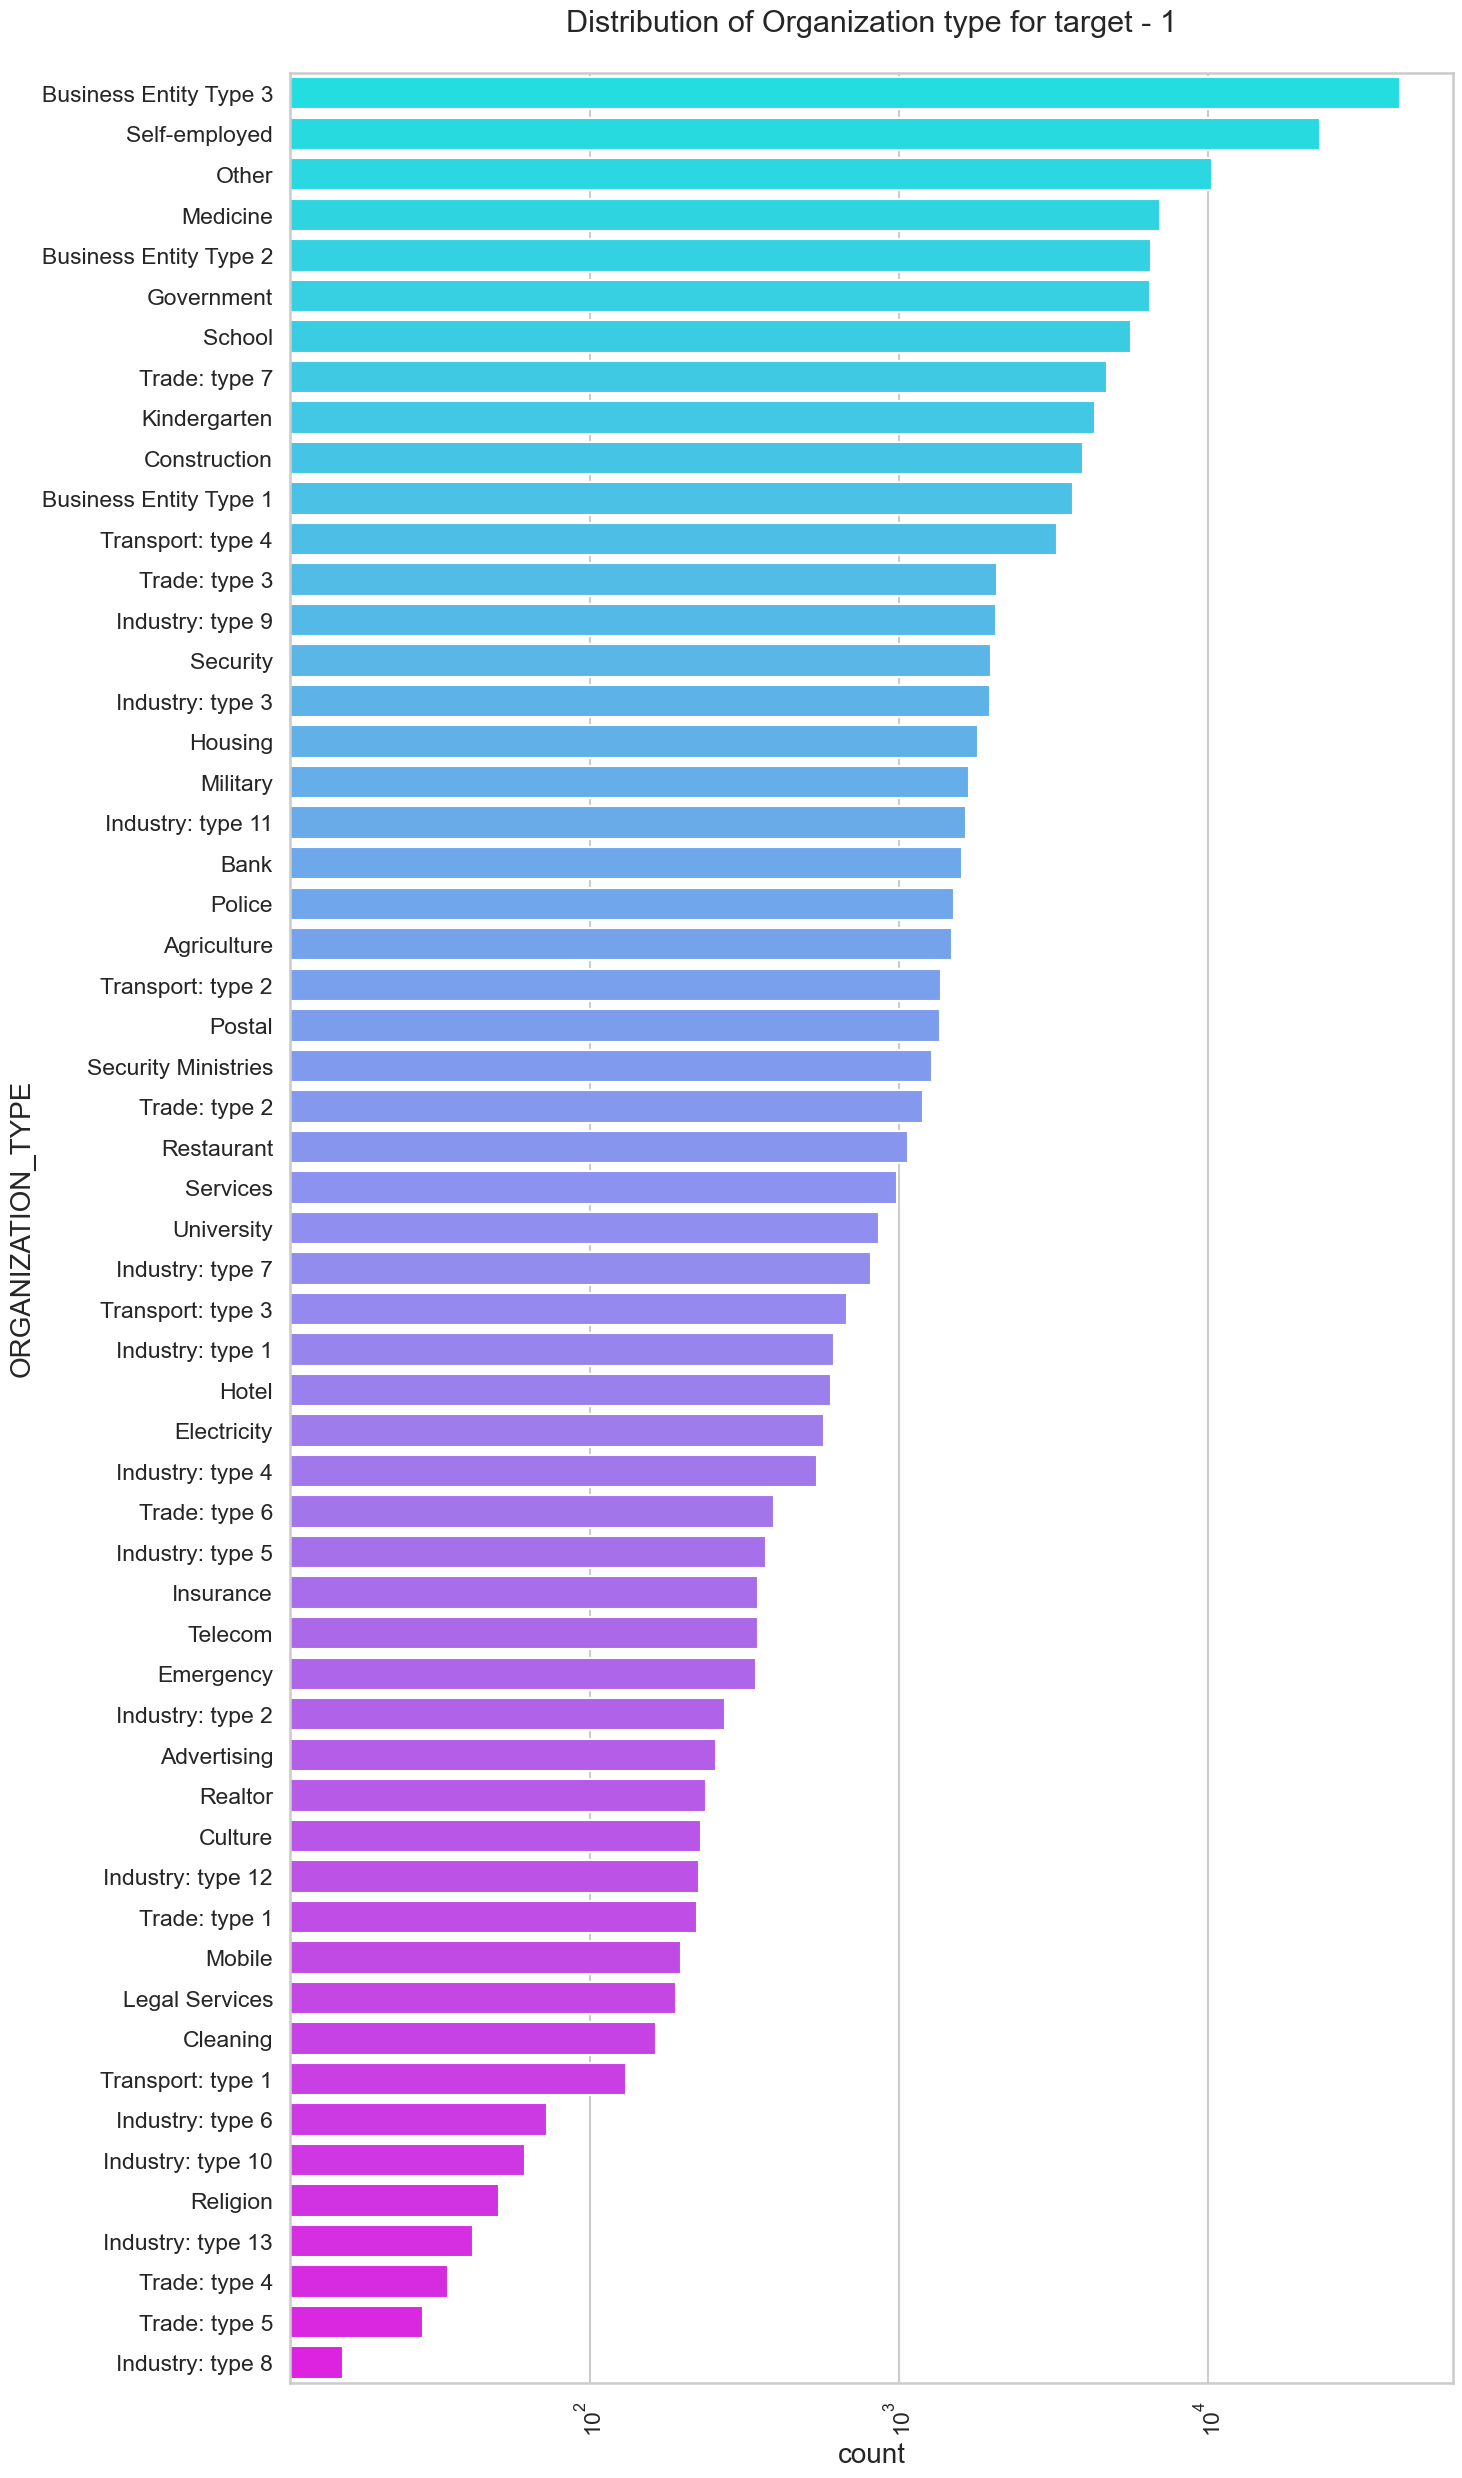

In [32]:
# Plotting for Organization type
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='ORGANIZATION_TYPE',order=target0_df['ORGANIZATION_TYPE'].value_counts().index,palette='cool')

plt.show()

Points to be concluded from the above graph.

1. Clients which have applied for credits are from most of the organization type ‘Business entity Type 3’ , ‘Self employed’ , ‘Other’ , ‘Medicine’ and ‘Government’.
2. Less clients are from Industry type 8,type 6, type 10, religion and  trade type 5, type 4.
3. Same as type 0 in distribution of organization type.


In [33]:
# Finding some correlation for numerical columns for both target 0 and 1 
target0_corr=target0_df.iloc[0:,2:]
target1_corr=target1_df.iloc[0:,2:]

target0=target0_corr.corr(method='spearman')
target1=target1_corr.corr(method='spearman')


In [34]:
# Correlation for target 0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.022330,-0.025515,-0.012267,-0.032008,0.265660,0.032284,0.155419,-0.118918,-0.029358,-0.023139,-0.015558,-0.004643,0.002432,0.007475,0.012573
AMT_INCOME_TOTAL,-0.022330,1.000000,0.404758,0.472780,0.110333,-0.056951,-0.060915,0.039204,-0.035573,0.071880,0.077132,0.158312,0.145285,-0.001026,-0.017111,-0.008677
AMT_CREDIT,-0.025515,0.404758,1.000000,0.826566,0.061088,-0.170905,-0.104544,-0.018481,-0.040091,0.036131,0.016291,0.042125,0.044667,-0.039073,-0.037848,-0.012439
AMT_ANNUITY,-0.012267,0.472780,0.826566,1.000000,0.064443,-0.101629,-0.074167,0.007564,-0.028327,0.031432,0.033498,0.071016,0.068393,-0.019440,-0.026403,-0.010633
REGION_POPULATION_RELATIVE,-0.032008,0.110333,0.061088,0.064443,1.000000,-0.044212,0.000681,-0.041802,-0.008497,0.132473,-0.023664,0.033347,0.057346,-0.048365,-0.034111,-0.007321
DAYS_BIRTH,0.265660,-0.056951,-0.170905,-0.101629,-0.044212,1.000000,0.306592,0.264938,0.084435,0.052641,0.056424,0.036640,0.011347,0.167454,0.110516,0.027262
DAYS_EMPLOYED,0.032284,-0.060915,-0.104544,-0.074167,0.000681,0.306592,1.000000,0.124561,0.107535,0.025742,0.066162,0.087016,0.063129,0.118676,0.125753,0.069113
DAYS_REGISTRATION,0.155419,0.039204,-0.018481,0.007564,-0.041802,0.264938,0.124561,1.000000,0.036881,-0.029125,0.017241,0.012469,0.004385,0.038067,0.044498,0.023783
DAYS_ID_PUBLISH,-0.118918,-0.035573,-0.040091,-0.028327,-0.008497,0.084435,0.107535,0.036881,1.000000,0.009077,0.024344,0.022543,0.011405,0.053443,0.033544,0.002171
HOUR_APPR_PROCESS_START,-0.029358,0.071880,0.036131,0.031432,0.132473,0.052641,0.025742,-0.029125,0.009077,1.000000,0.049636,0.064439,0.050819,0.010699,-0.007585,-0.012654


In [35]:
# Correlation for target 1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY
CNT_CHILDREN,1.000000,-0.037665,0.007481,0.023211,-0.029165,0.174499,0.008859,0.108570,-0.090191,-0.044284,-0.033691,-0.042605,-0.032501,-0.013514,-0.007648,0.007098
AMT_INCOME_TOTAL,-0.037665,1.000000,0.366186,0.427430,0.044560,-0.111089,-0.051020,0.011363,-0.050738,0.076919,0.083272,0.162526,0.149885,-0.007338,-0.003879,0.010693
AMT_CREDIT,0.007481,0.366186,1.000000,0.809812,0.031644,-0.199486,-0.109669,-0.016136,-0.075586,0.023928,0.023040,0.037427,0.036706,-0.036176,-0.024449,0.001247
AMT_ANNUITY,0.023211,0.427430,0.809812,1.000000,0.016484,-0.098777,-0.060201,0.024776,-0.050008,0.018131,0.033433,0.065366,0.064370,-0.017809,-0.008512,0.009400
REGION_POPULATION_RELATIVE,-0.029165,0.044560,0.031644,0.016484,1.000000,-0.043291,-0.012224,-0.027498,-0.019595,0.111265,-0.032551,-0.003994,0.019487,-0.053122,-0.044515,-0.016413
DAYS_BIRTH,0.174499,-0.111089,-0.199486,-0.098777,-0.043291,1.000000,0.257614,0.190669,0.150712,0.040297,0.045552,0.023396,0.003251,0.143878,0.087216,0.002097
DAYS_EMPLOYED,0.008859,-0.051020,-0.109669,-0.060201,-0.012224,0.257614,1.000000,0.089772,0.105699,0.006445,0.064002,0.077696,0.053358,0.113424,0.139068,0.074806
DAYS_REGISTRATION,0.108570,0.011363,-0.016136,0.024776,-0.027498,0.190669,0.089772,1.000000,0.058779,-0.041683,-0.001571,-0.009931,-0.009260,0.014654,0.039013,0.023363
DAYS_ID_PUBLISH,-0.090191,-0.050738,-0.075586,-0.050008,-0.019595,0.150712,0.105699,0.058779,1.000000,0.007305,0.019722,0.002591,-0.007237,0.043062,0.016294,-0.013289
HOUR_APPR_PROCESS_START,-0.044284,0.076919,0.023928,0.018131,0.111265,0.040297,0.006445,-0.041683,0.007305,1.000000,0.057807,0.064926,0.048775,0.006525,0.009372,0.004998


In [36]:
# Now, plotting the above correlation with heat map as it is the best choice to visulaize

# figure size

def targets_corr(data,title):
    plt.figure(figsize=(15, 10))
    plt.rcParams['axes.titlesize'] = 25
    plt.rcParams['axes.titlepad'] = 70

# heatmap with a color map of choice


    sns.heatmap(data, cmap="RdYlGn",annot=False)

    plt.title(title)
    plt.yticks(rotation=0)
    plt.show()

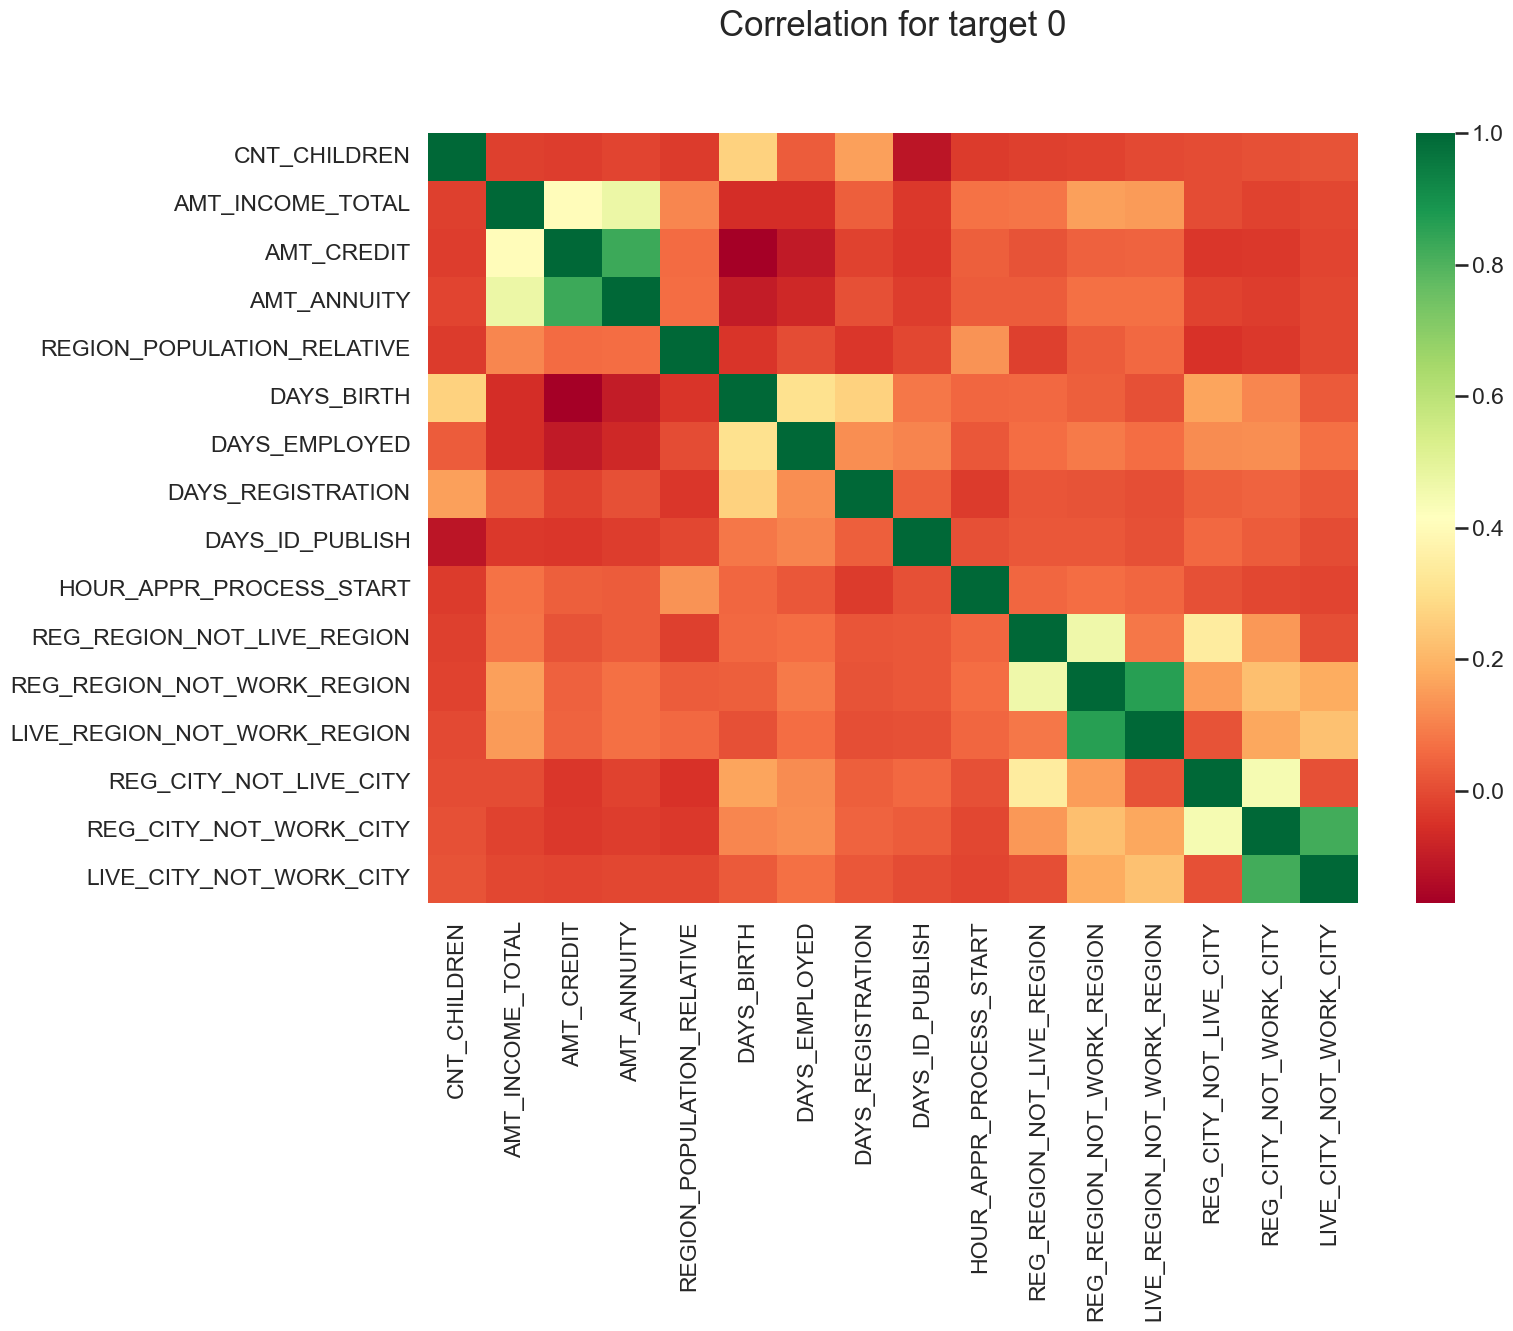

In [37]:
# For Target 0
targets_corr(data=target0,title='Correlation for target 0')

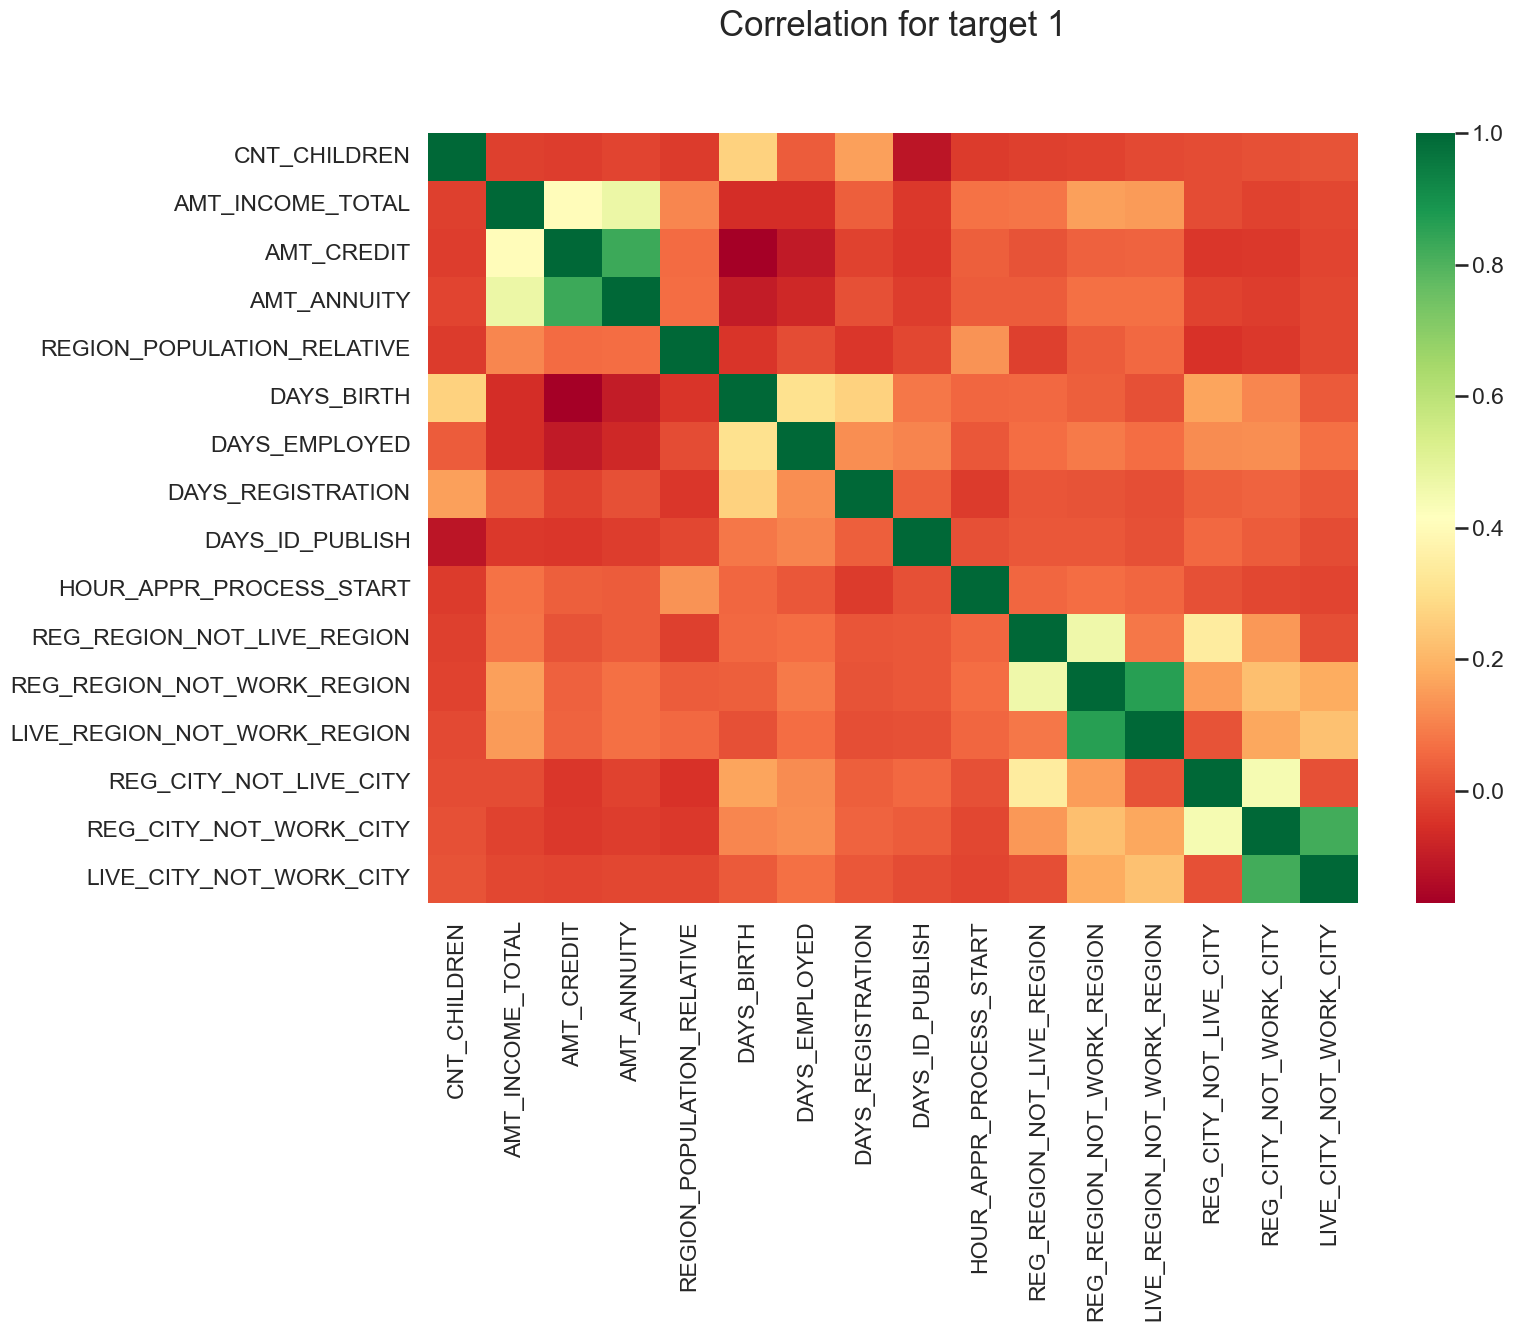

In [38]:
targets_corr(data=target0,title='Correlation for target 1')

As we can see from above correlation heatmap, There are number of observation we can point out

1. Credit amount is inversely proportional to the date of birth, which means Credit amount is higher for low age and vice-versa.
2. Credit amount is inversely proportional to the number of children client have, means Credit amount is higher for less children count client have and vice-versa.
3. Income amount is inversely proportional to the number of children client have, means more income for less children client have and vice-versa.
4. less children client have in densely populated area.
5. Credit amount is higher to densely populated area.
6. The income is also higher in densely populated area.

In [39]:
# For Target 1

def univariate_numerical(data,col,title):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    plt.title(title)
    plt.yscale('log')
    sns.boxplot(data =target1_df, x=col,orient='v')
    plt.show()

This heat map for Target 1 is also having quite a same observation just like Target 0. But for few points are different. They are listed below.

1. The client's permanent address does not match contact address are having less children and vice-versa
2. the client's permanent address does not match work address are having less children and vice-versa

**Univariate analysis for variables**

**For Target 0 - Finding any outliers** 

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


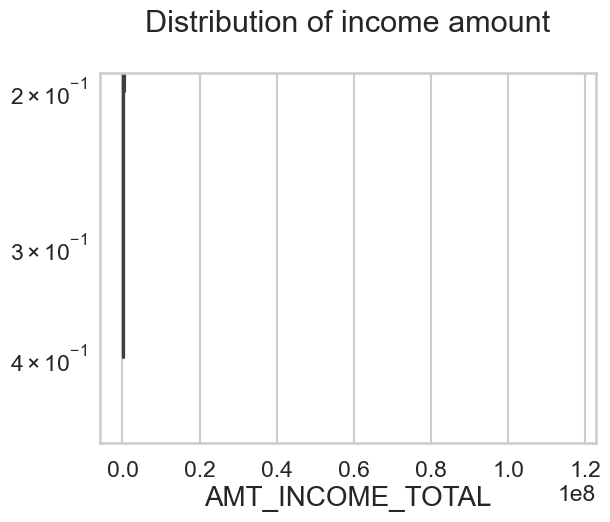

In [40]:
# Distribution of income amount
univariate_numerical(data=target0_df, col="AMT_INCOME_TOTAL", title='Distribution of income amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


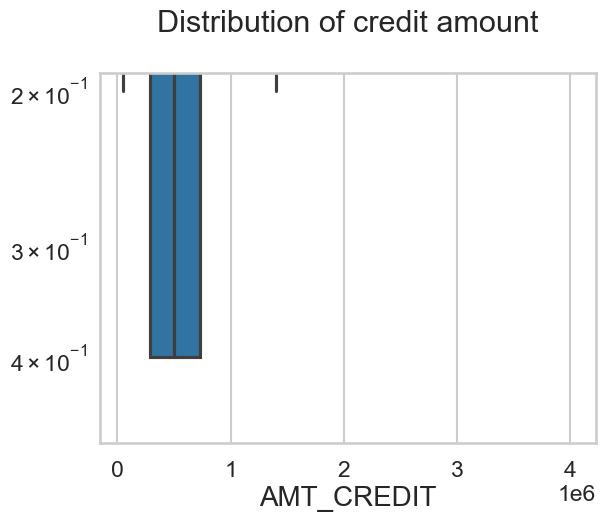

In [41]:
# Disrtibution of credit amount
univariate_numerical(data=target0_df,col='AMT_CREDIT',title='Distribution of credit amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


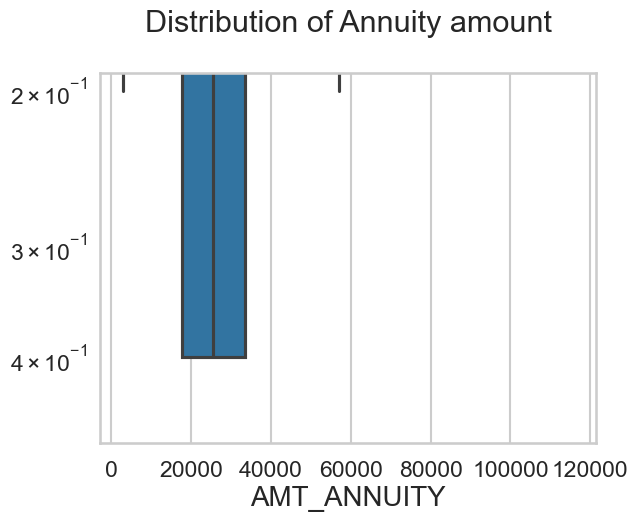

In [42]:
# Distribution of anuuity amount

univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.


**For Target 1 - Finding any outliers**

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


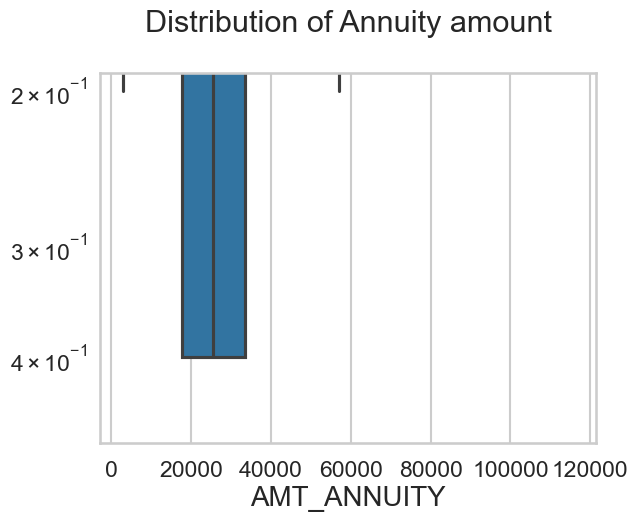

In [43]:
# Distribution of income amount
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in income amount.
2. The third quartiles is very slim for income amount.
3. Most of the clients of income are present in first quartile.


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


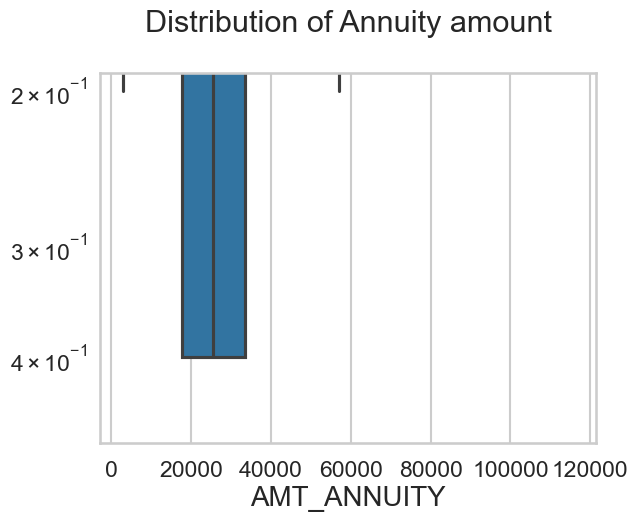

In [44]:
# Distribution of credit amount
univariate_numerical(data=target0_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in credit amount.
2. The first quartile is bigger than third quartile for credit amount which means most of the credits of clients are present in the first quartile.

c:\Users\DELL\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


c:\Users\DELL\anaconda3\lib\site-packages\seaborn\categorical.py:376: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(-.5, len(self.plot_data) - .5, auto=None)


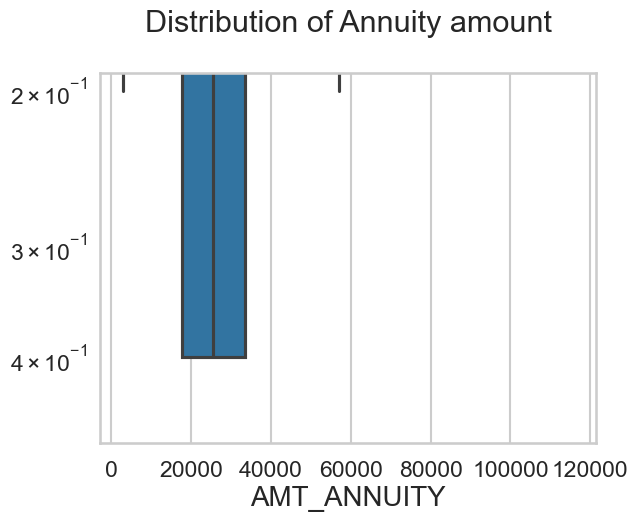

In [45]:
# Distribution of Annuity amount
univariate_numerical(data=target1_df,col='AMT_ANNUITY',title='Distribution of Annuity amount')

Few points can be concluded from the graph above.

1. Some outliers are noticed in annuity amount.
2. The first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

**Bivariate analysis for numerical variables**

**For Target 0**

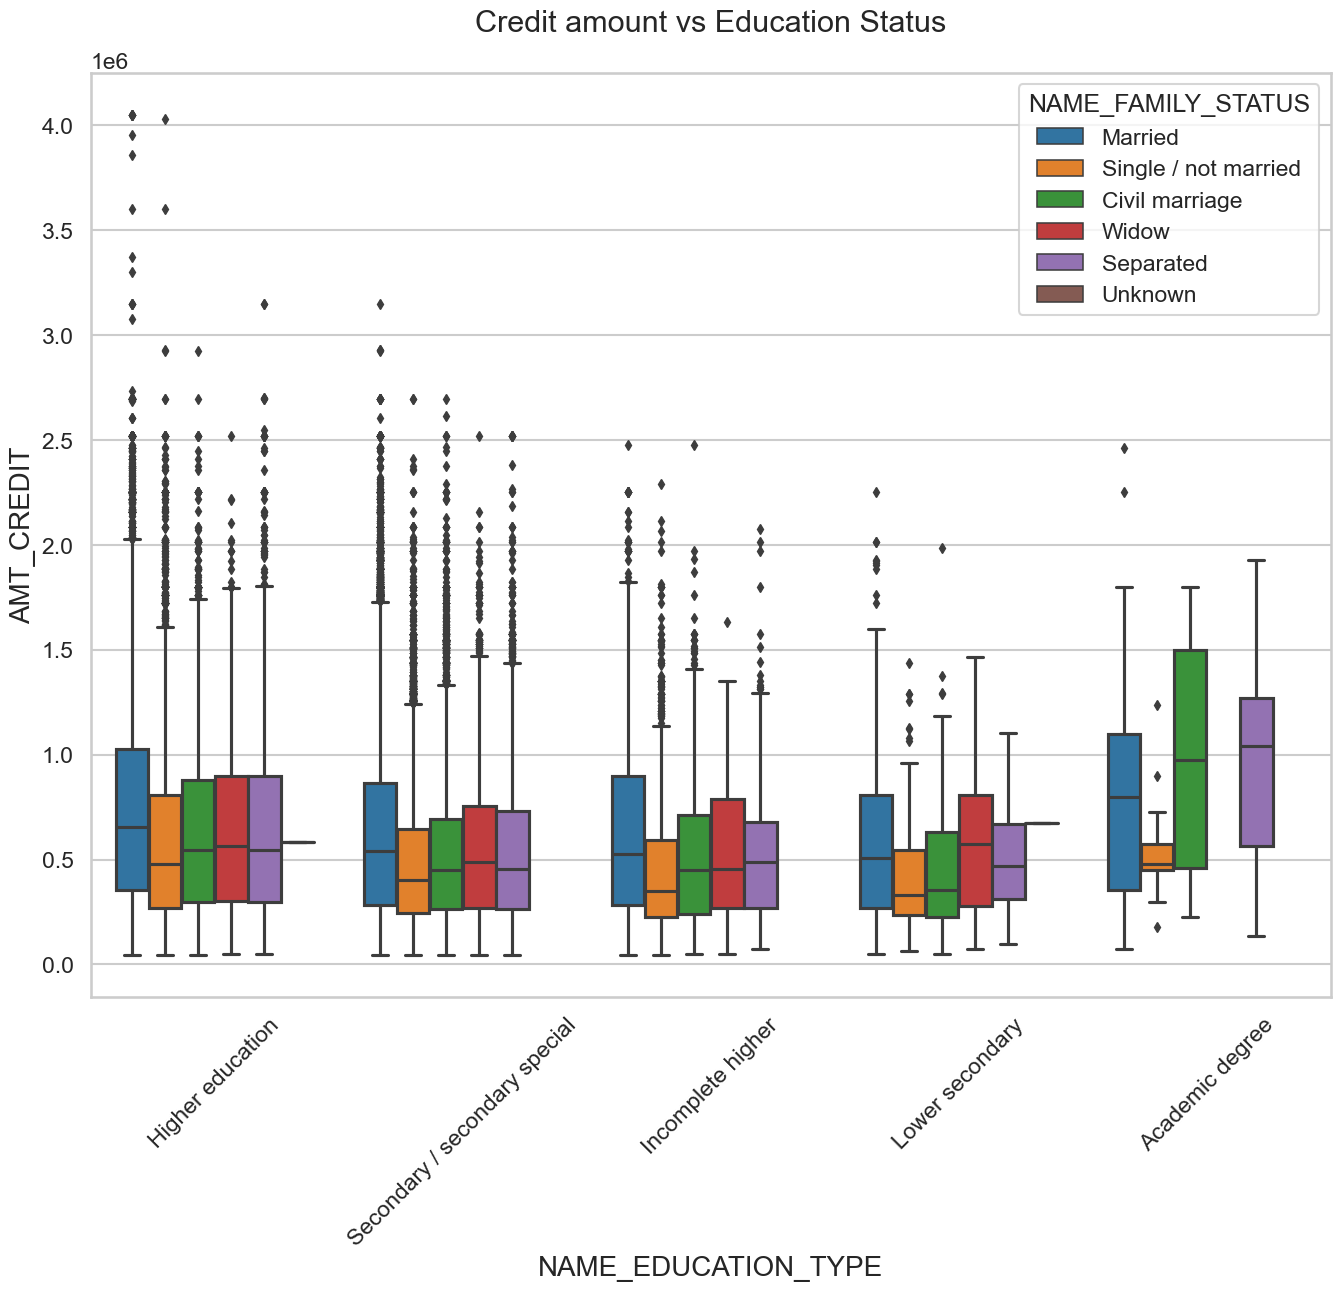

In [46]:
# Box plotting for Credit amount

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit amount vs Education Status')
plt.show()

From the above box plot we can conclude that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others.
Also, higher education of family status of 'marriage', 'single' and 'civil marriage' are having more outliers.
Civil marriage for Academic degree is having most of the credits in the third quartile.

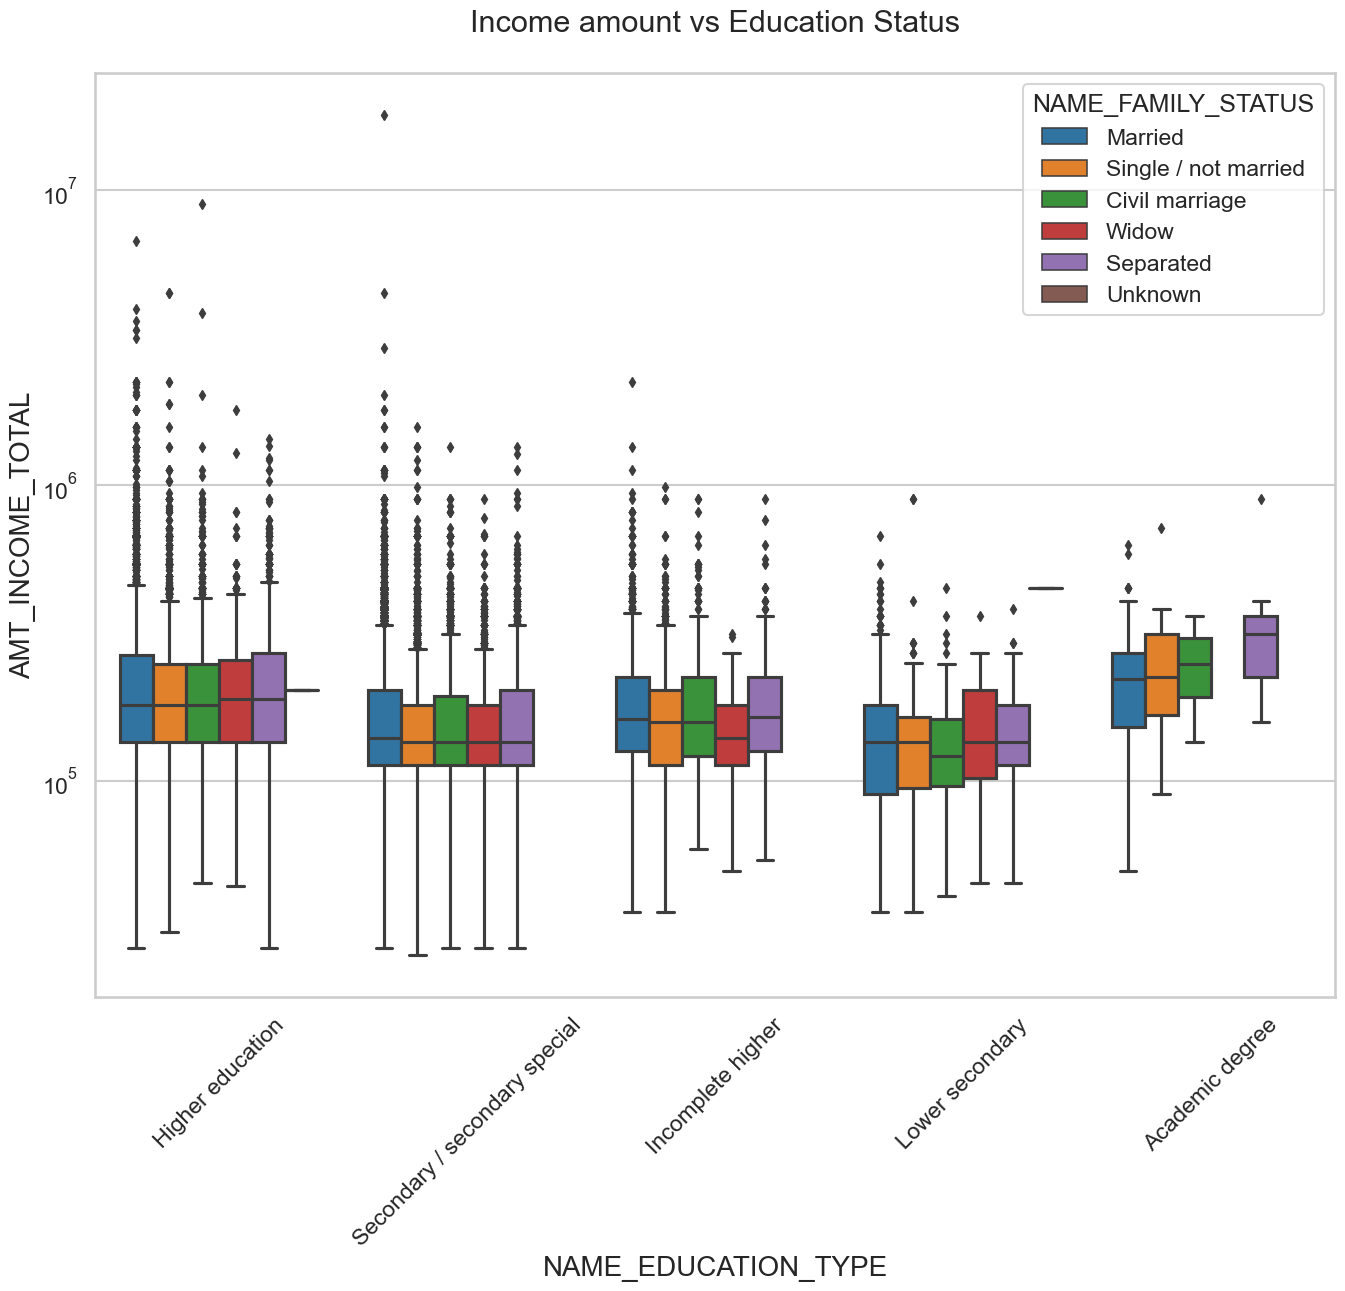

In [47]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. It does contain many outliers. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary of civil marriage family status are have less income amount than others.

**For Target 1**

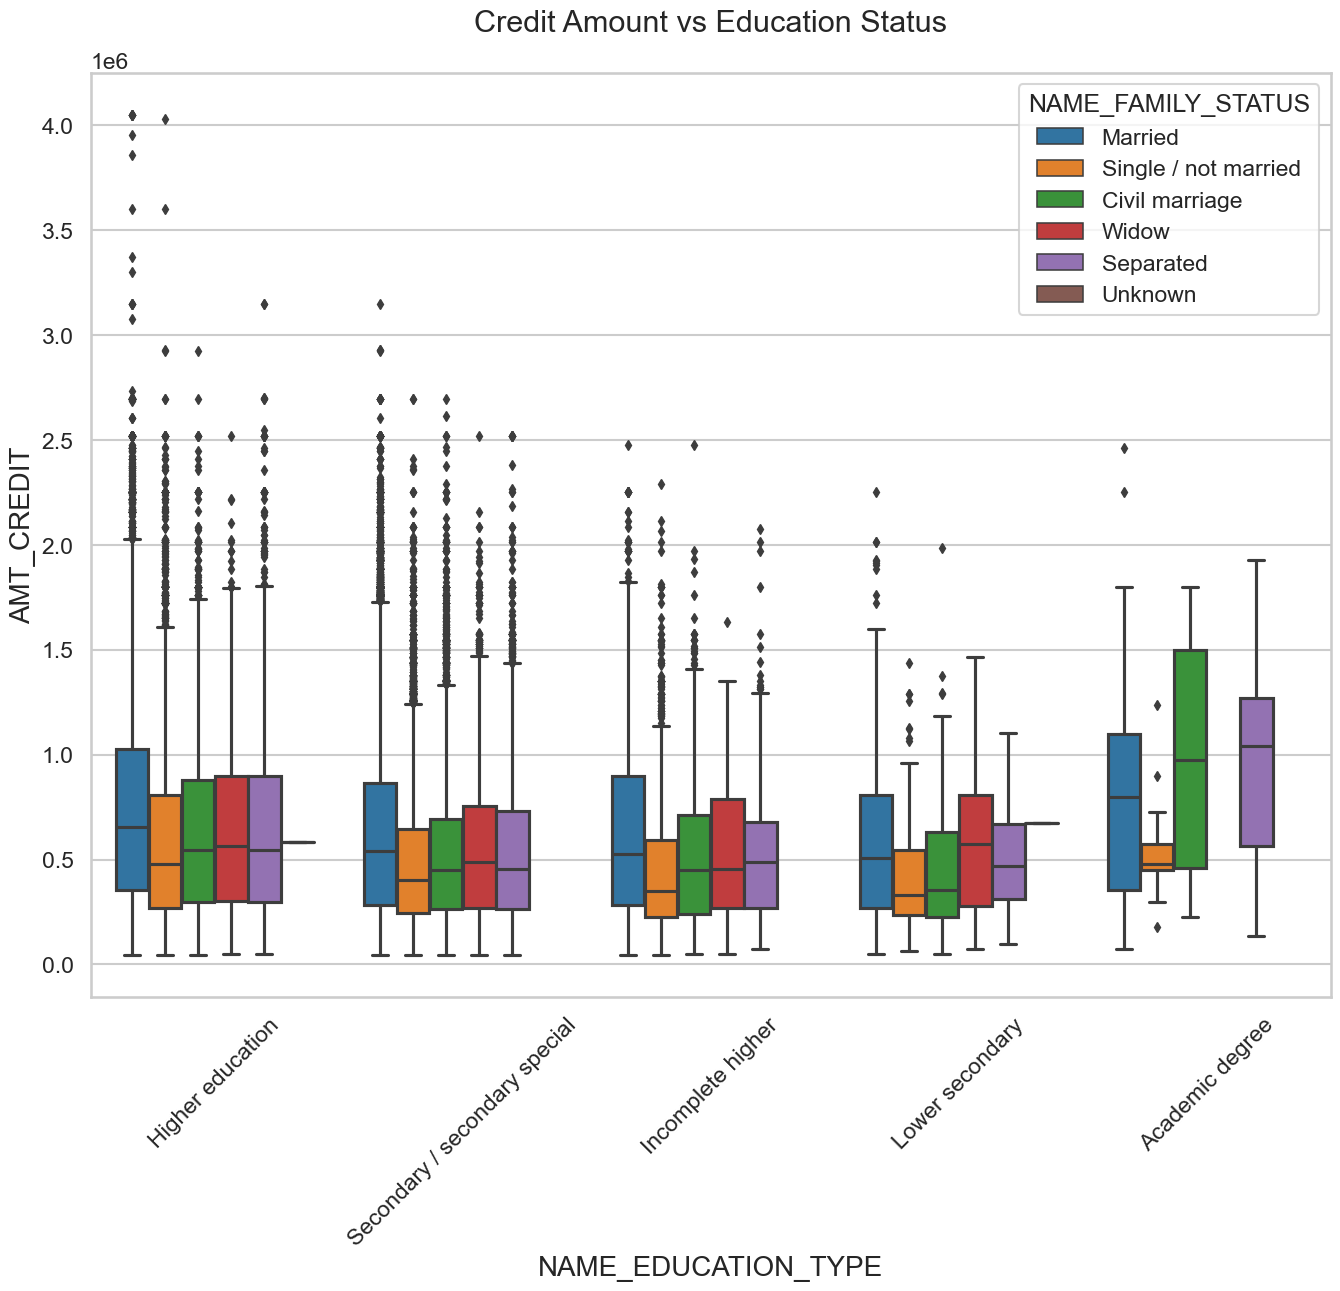

In [48]:
# Box plotting for credit amount
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Credit Amount vs Education Status')
plt.show()

Quite similar with Target 0
From the above box plot we can say that Family status of 'civil marriage', 'marriage' and 'separated' of Academic degree education are having higher number of credits than others. Most of the outliers are from Education type 'Higher education' and 'Secondary'.
Civil marriage for Academic degree is having most of the credits in the third quartile.

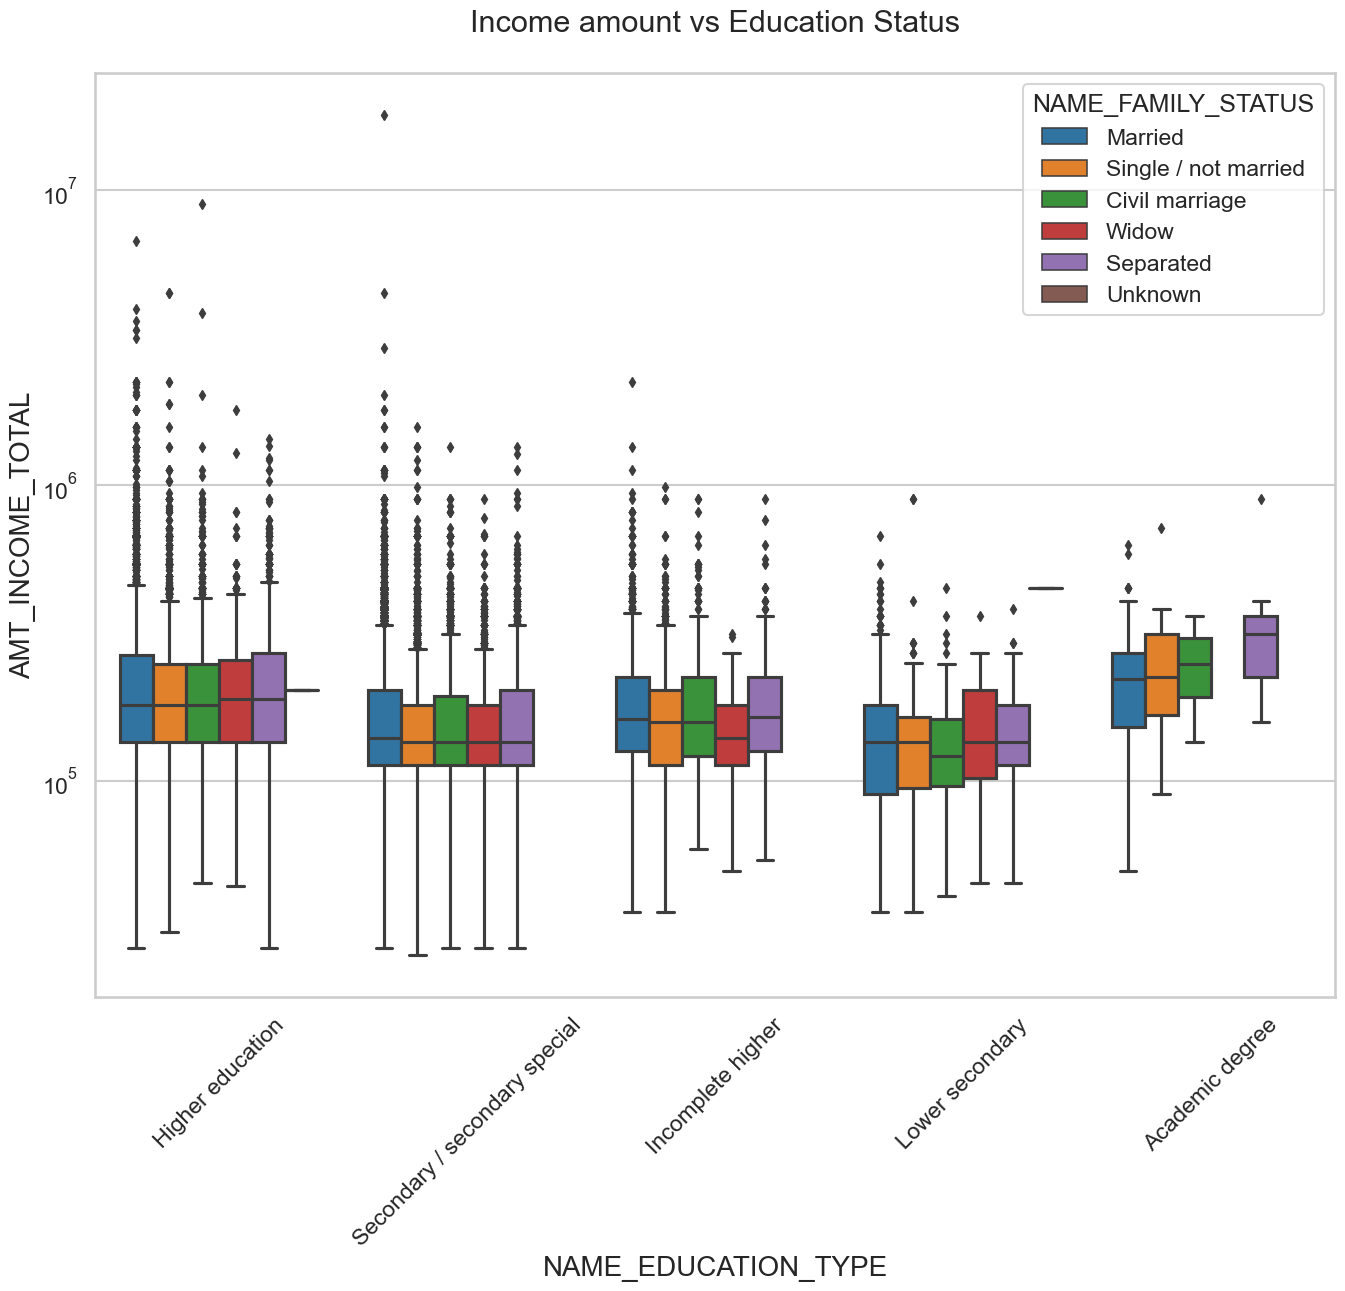

In [49]:
# Box plotting for Income amount in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =target0_df, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('Income amount vs Education Status')
plt.show()

Have some similarity with Target0,
From above boxplot for Education type 'Higher education' the income amount is mostly equal with family status. Less outlier are having for Academic degree but there income amount is little higher that Higher education.
Lower secondary are have less income amount than others.

In [50]:
# Reading the dataset of previous application

df1 = pd.read_excel('previous_application.xlsx')
emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [51]:
# Cleaning the missing data

# listing the null values columns having more than 30%
emptycol1=df1.isnull().sum()
emptycol1=emptycol1[emptycol1.values>(0.3*len(emptycol1))]
len(emptycol1)

15

In [52]:
# Removing those 15 columns
emptycol1 = list(emptycol1[emptycol1.values>=0.3].index)
df1.drop(labels=emptycol1,axis=1,inplace=True)

df1.shape

(1048575, 22)

In [53]:
# Removing the column values of 'XNA' and 'XAP'

df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df1=df1.drop(df1[df1['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
df1=df1.drop(df1[df1['NAME_CLIENT_TYPE']=='XNA'].index)   
df1=df1.drop(df1[df1['NAME_PAYMENT_TYPE']=='XNA'].index)
df1=df1.drop(df1[df1['CODE_REJECT_REASON']=='XNA'].index)
df1.shape

(39679, 22)

In [54]:
# Now merging the Application dataset with previous appliaction dataset

new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')
new_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8940\2545313773.py:3: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  new_df=pd.merge(left=df,right=df1,how='inner',on='SK_ID_CURR',suffixes='_x')


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [55]:
# Renaming the column names after merging
new_df1 = new_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)
new_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [56]:
# Removing unwanted columns for analysis


#new_df1.drop(['NAME_SELLER_INDUSTRY','SK_ID_CURR','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START'],axis=1,inplace=True)
#new_df1.drop(['NAME_SELLER_INDUSTRY'],axis=1, inplace=True)
new_df1.drop(['NAME_GOODS_CATEGORY'],axis=1, inplace=True)
        #,'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV','HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)
new_df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,-119,Cash through the bank,HC,Repeater,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,-695,Cash through the bank,XAP,Refreshed,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,-539,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,-466,Cash through the bank,XAP,New,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,-546,Cash through the bank,LIMIT,Repeater,Cash,walk-in,Credit and cash offices,-1,XNA,high


**Performing univariate analysis**

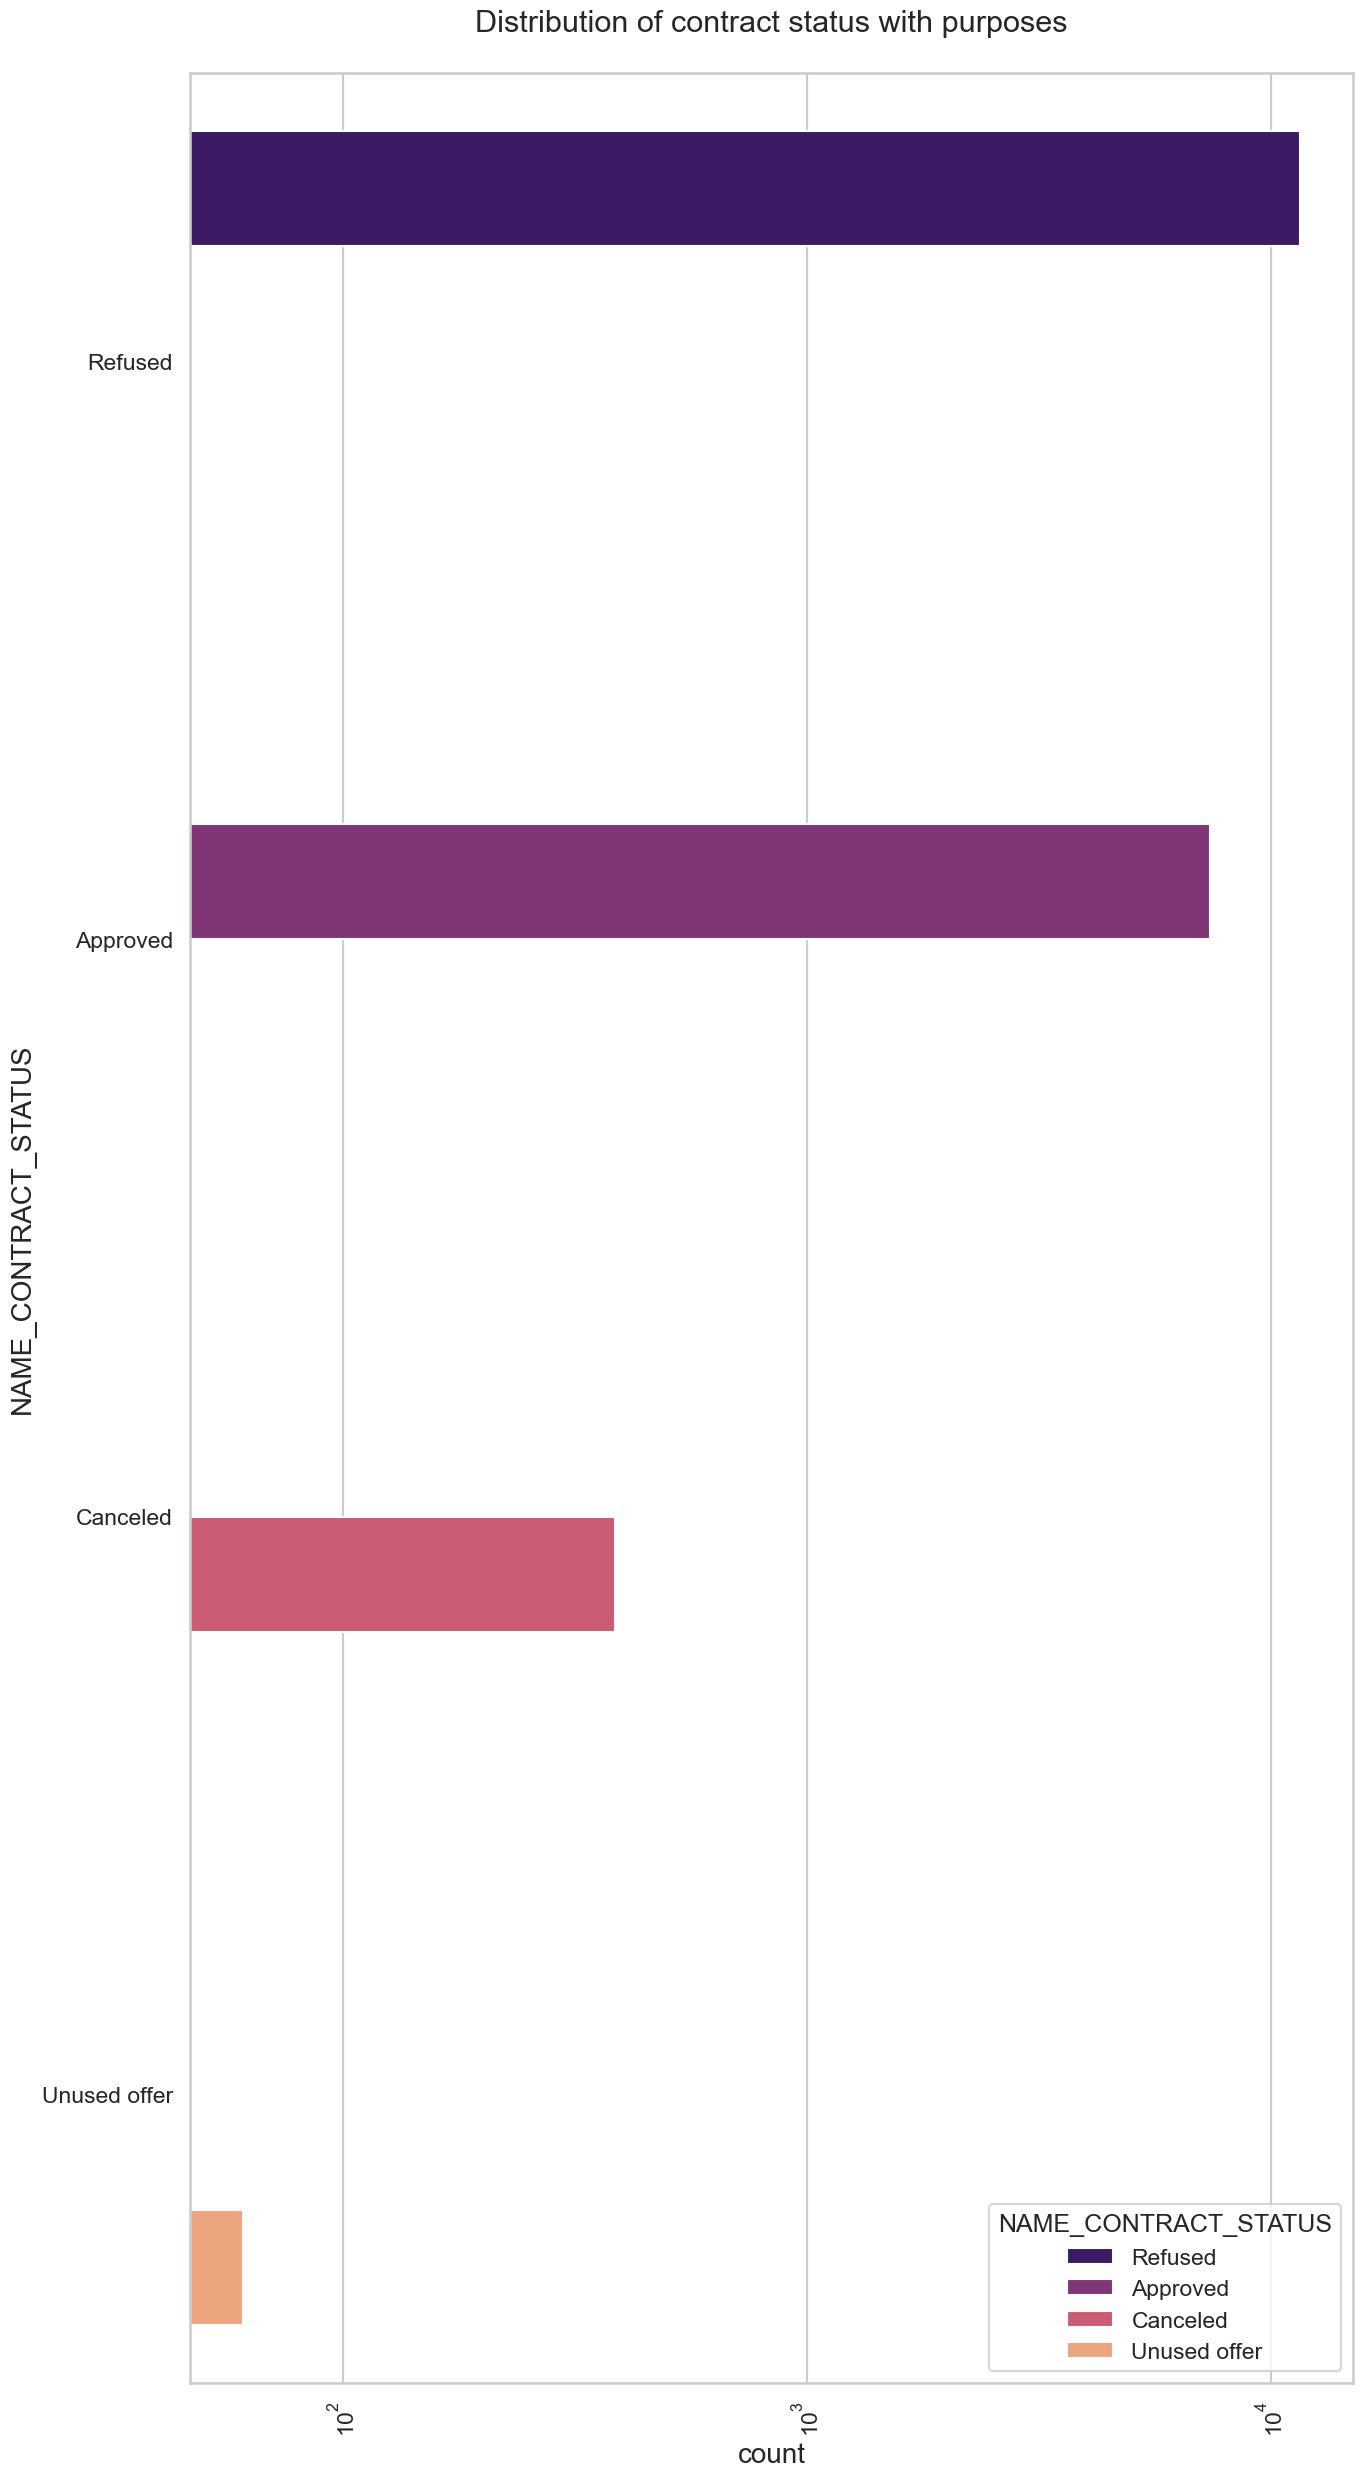

In [57]:

# Distribution of contract status in logarithmic scale

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'NAME_CONTRACT_STATUS', 
                   order=new_df1['NAME_CONTRACT_STATUS'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma') 

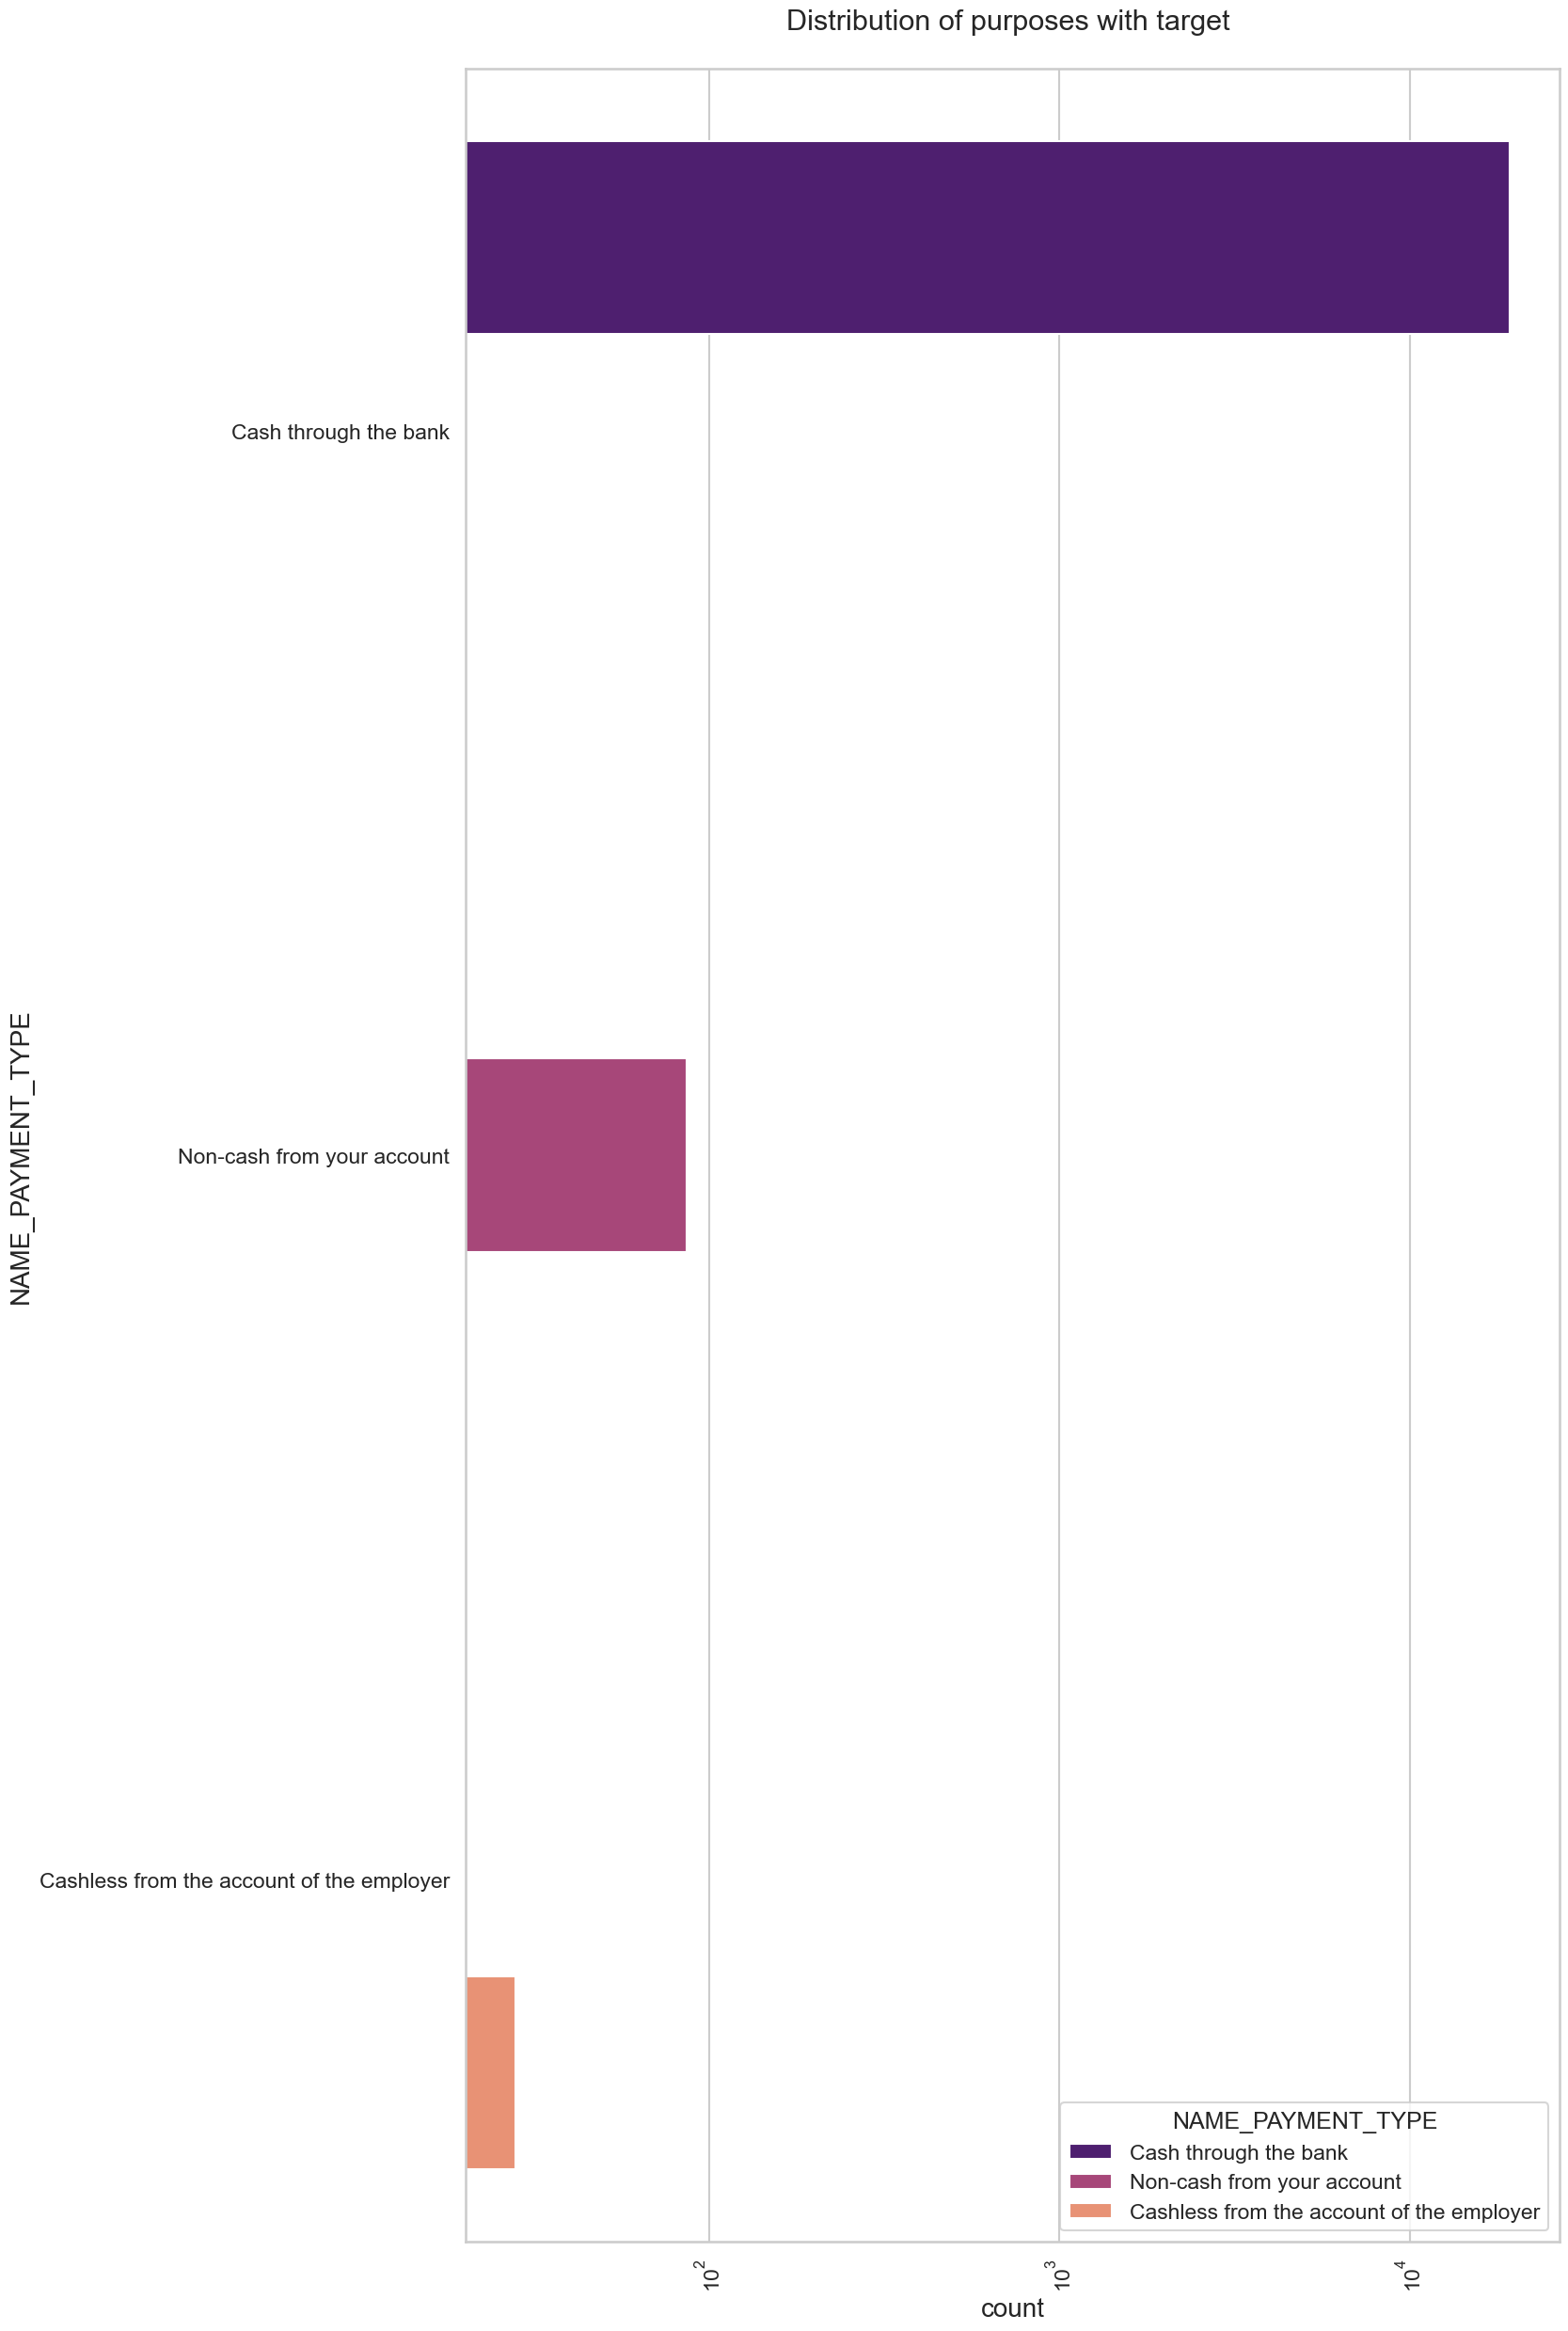

In [58]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = new_df1, y= 'NAME_PAYMENT_TYPE', 
                   order=new_df1['NAME_PAYMENT_TYPE'].value_counts().index,hue = 'NAME_PAYMENT_TYPE',palette='magma') 

**Performing bivariate analysis**

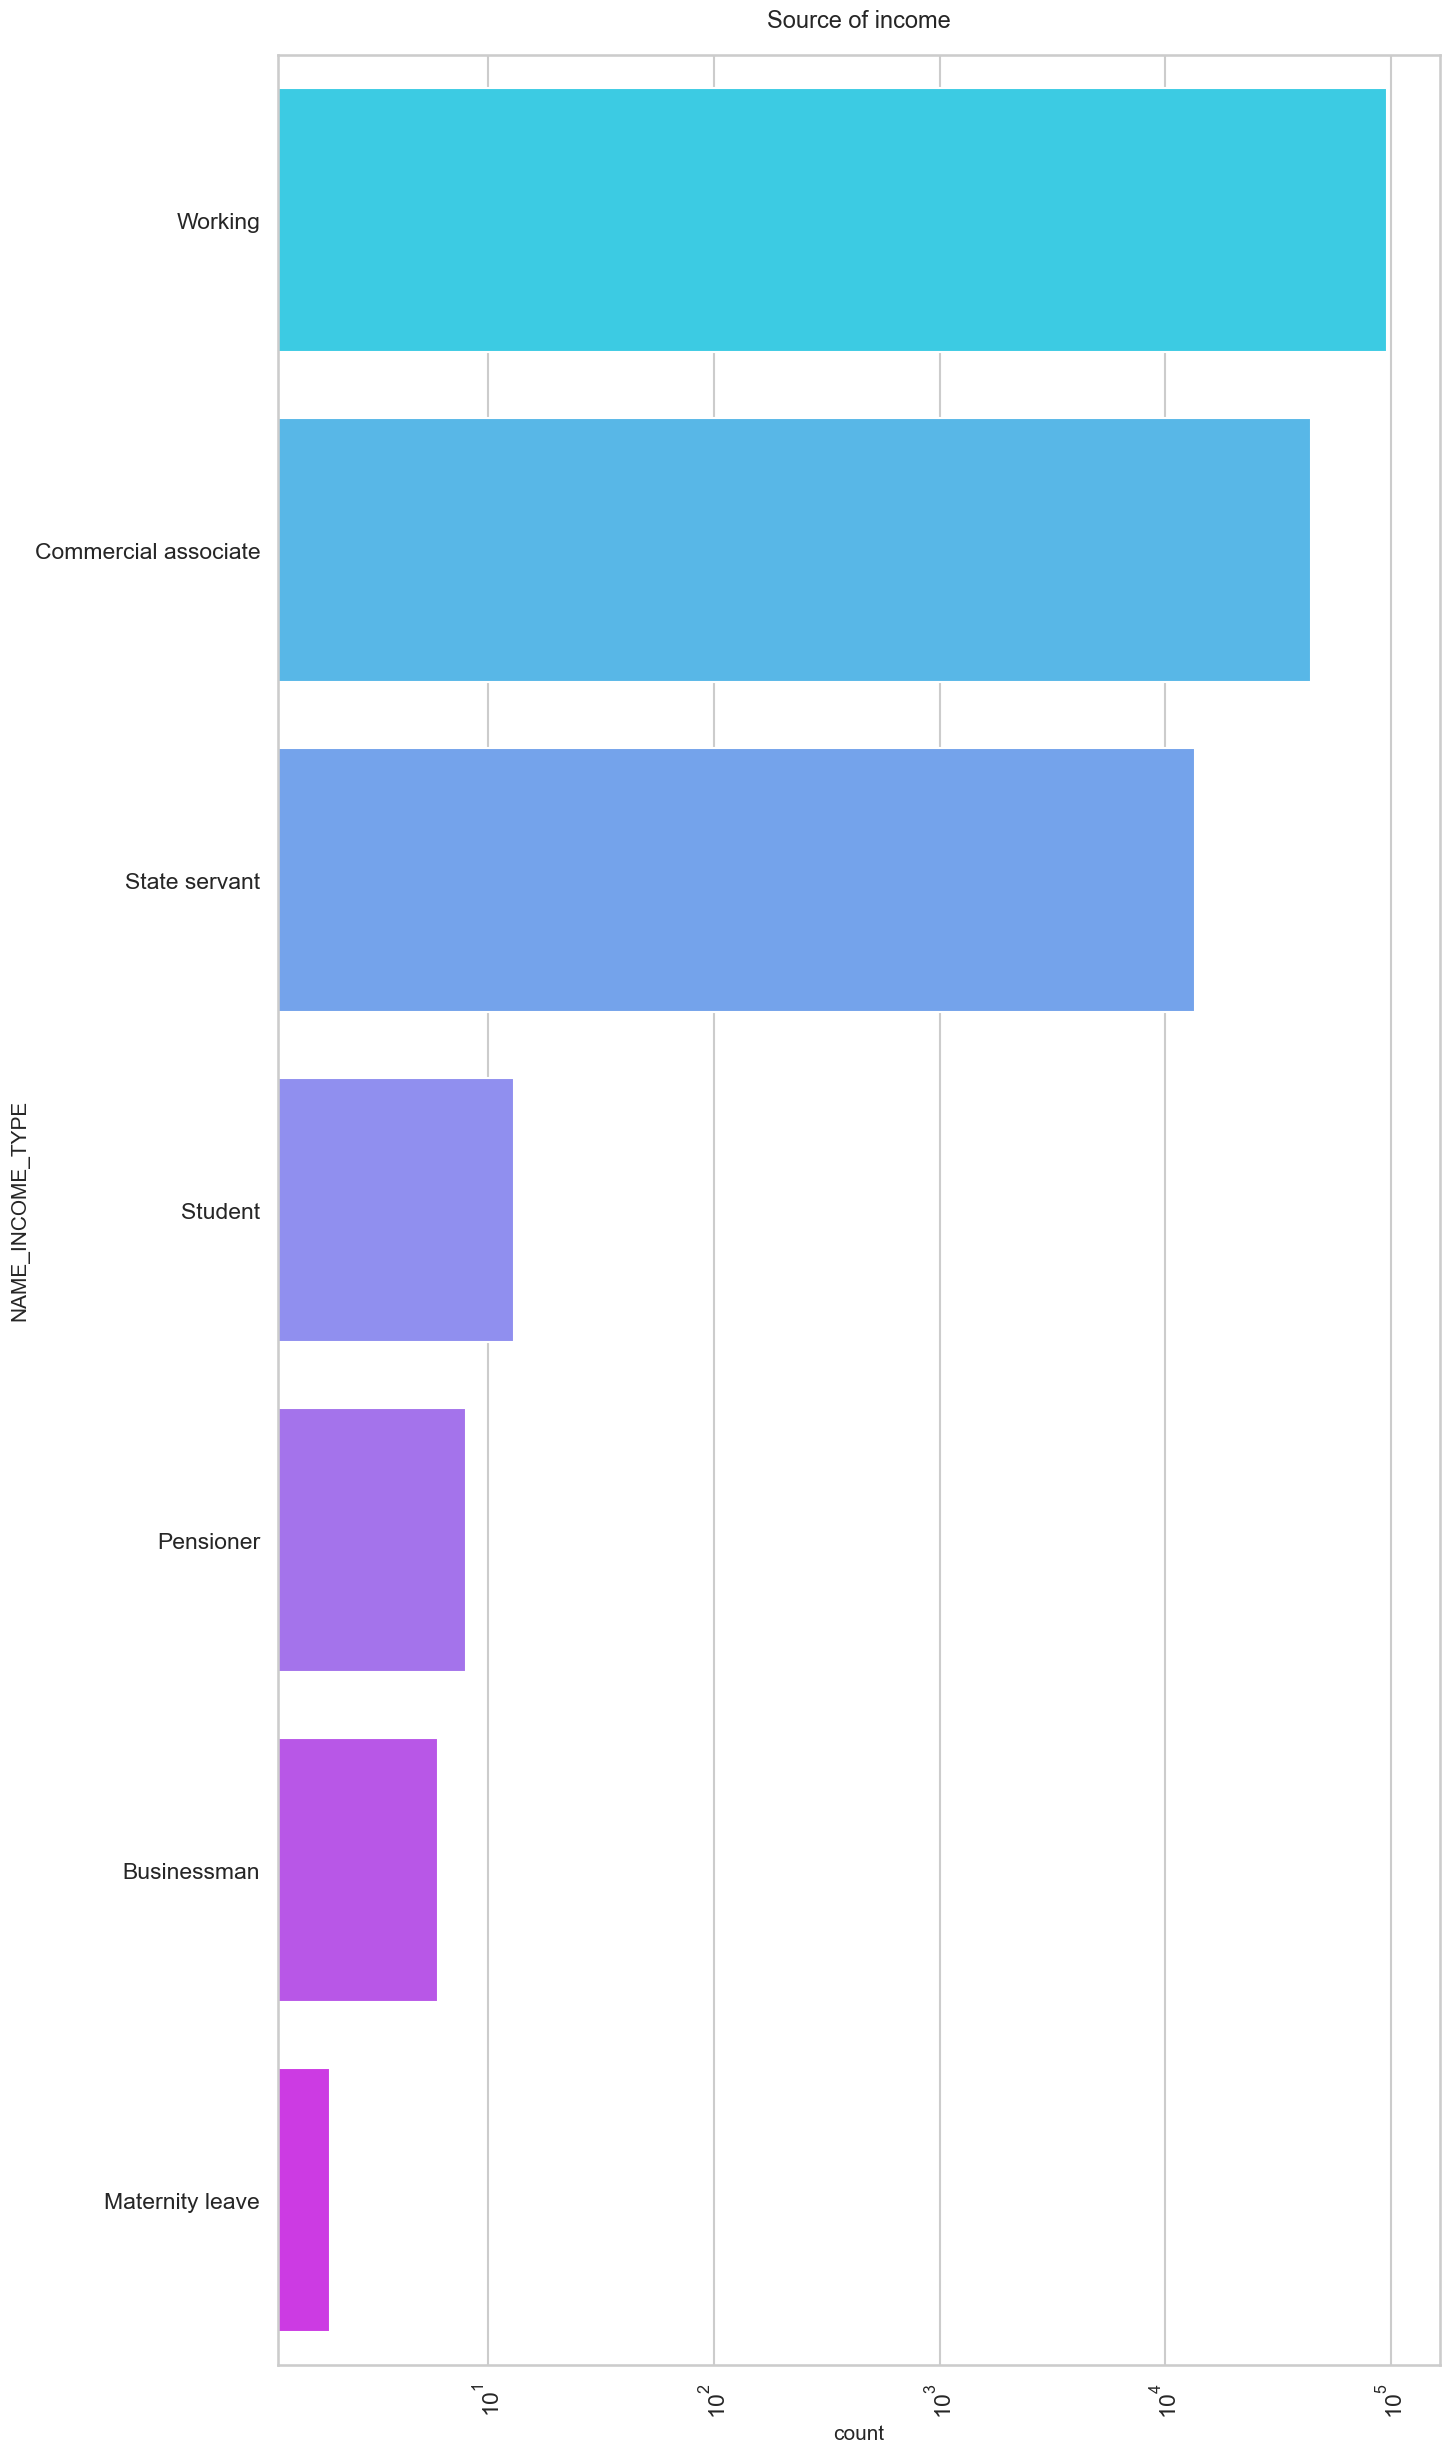

In [59]:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 17
plt.rcParams['axes.titlepad'] = 20

plt.title("Source of income")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=target0_df,y='NAME_INCOME_TYPE',order=target0_df['NAME_INCOME_TYPE'].value_counts().index,palette='cool')

plt.show()

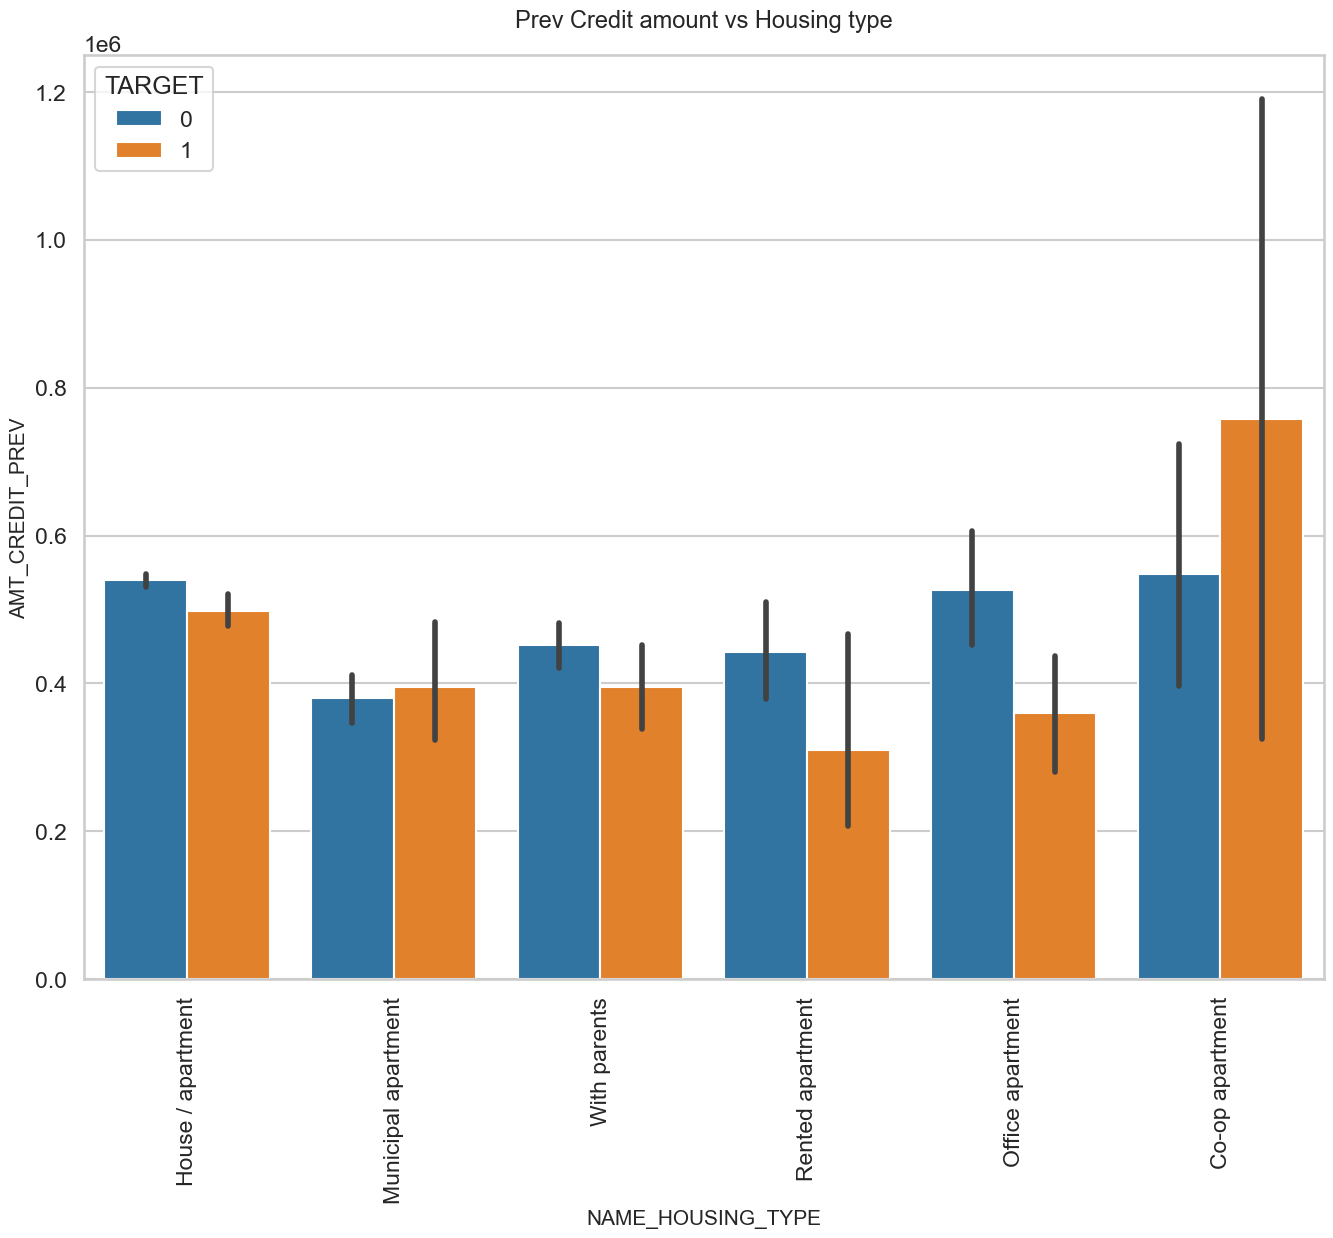

In [60]:
# Box plotting for Credit amount prev vs Housing type in logarithmic scale

plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =new_df1, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Here for Housing type, office appartment is having higher credit of target 0 and co-op apartment is having higher credit of target 1.
So, we can conclude that bank should avoid giving loans to the housing type of co-op apartment as they are having difficulties in payment.
Bank can focus mostly on housing type with parents or House\appartment or miuncipal appartment for successful payments.

# CONCLUSION

**1. Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with housing ‘type other
     than ‘Co-op apartment’ for successful payments.**

**2. Banks should focus less on income type ‘Working’ as they are having most number of unsuccessful payments.**

**3. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.**

**4. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.**


In [61]:
#df1.head()

In [62]:
mydf=new_df1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY']]


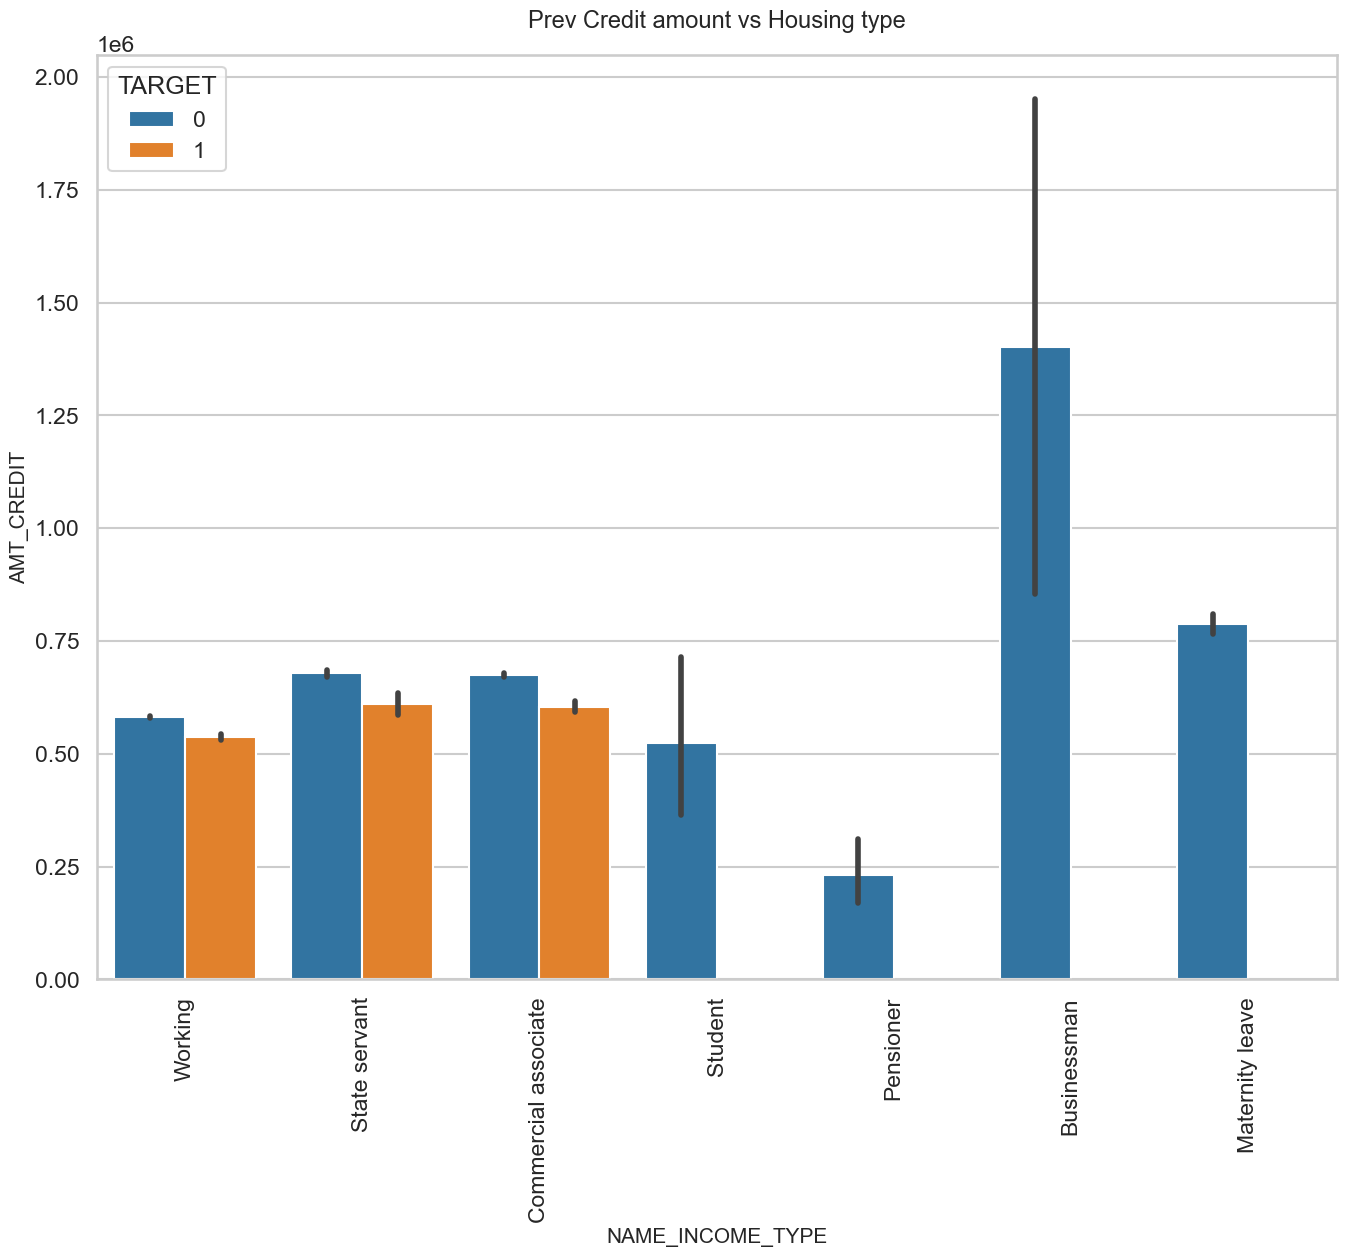

In [63]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df, y='AMT_CREDIT',hue='TARGET',x='NAME_INCOME_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

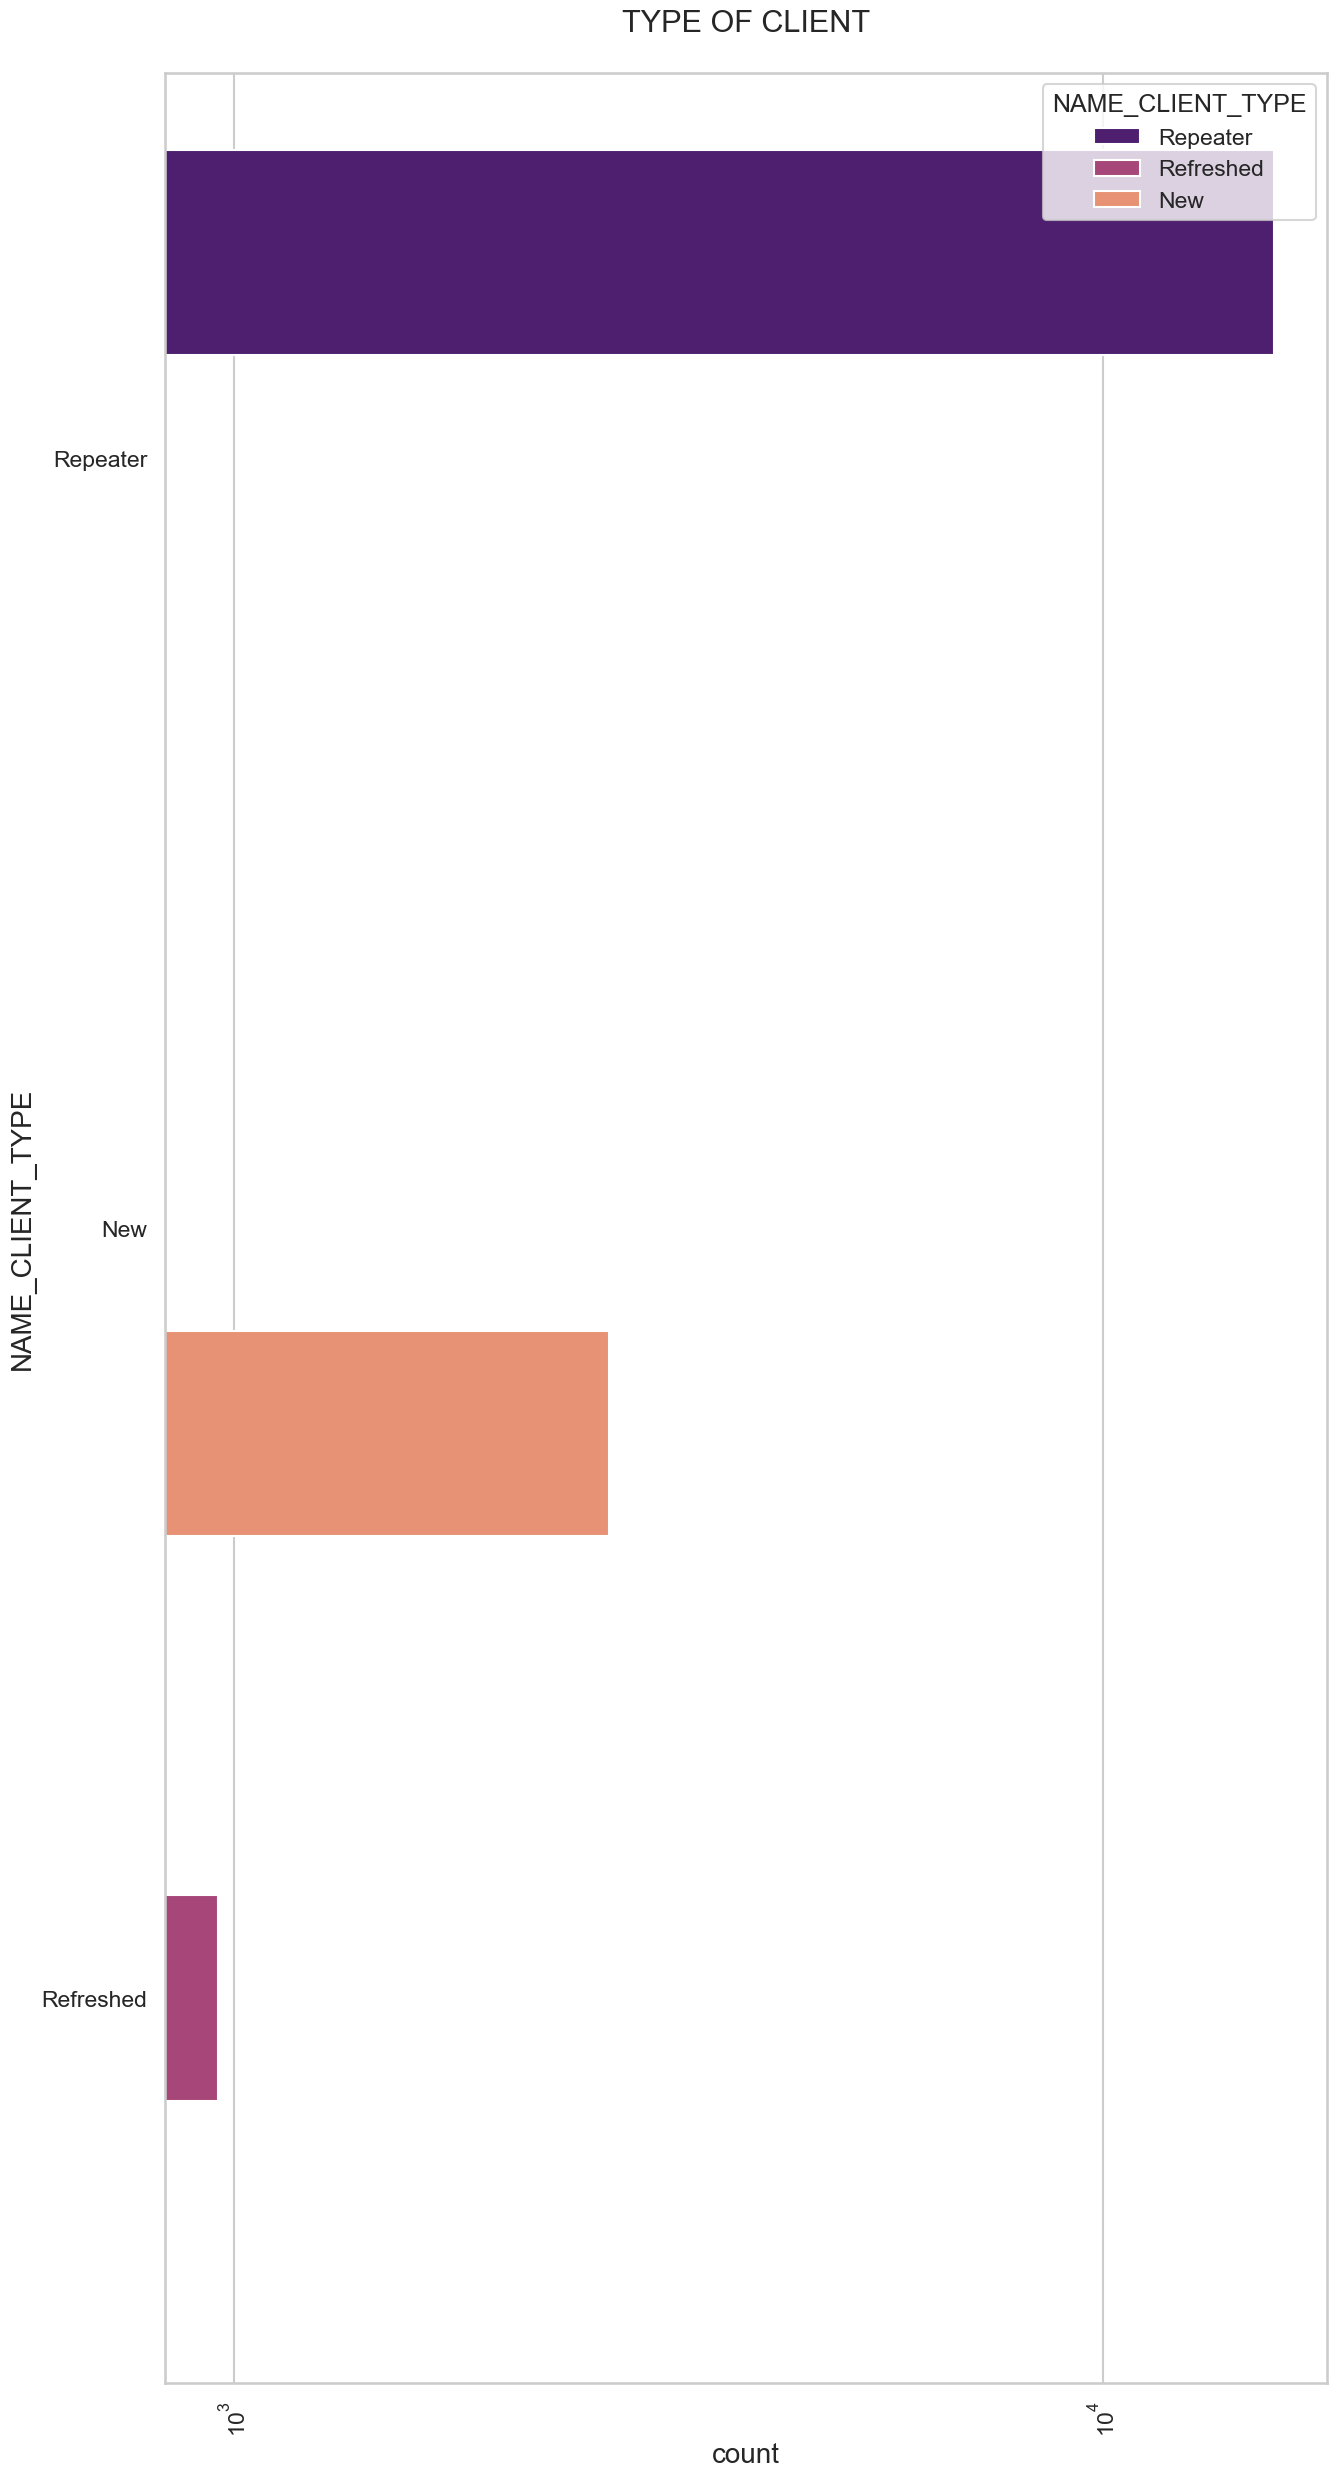

In [64]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('TYPE OF CLIENT')
ax = sns.countplot(data = new_df1, y= 'NAME_CLIENT_TYPE', 
                   order=new_df1['NAME_CLIENT_TYPE'].value_counts().index,hue = 'NAME_CLIENT_TYPE',palette='magma') 

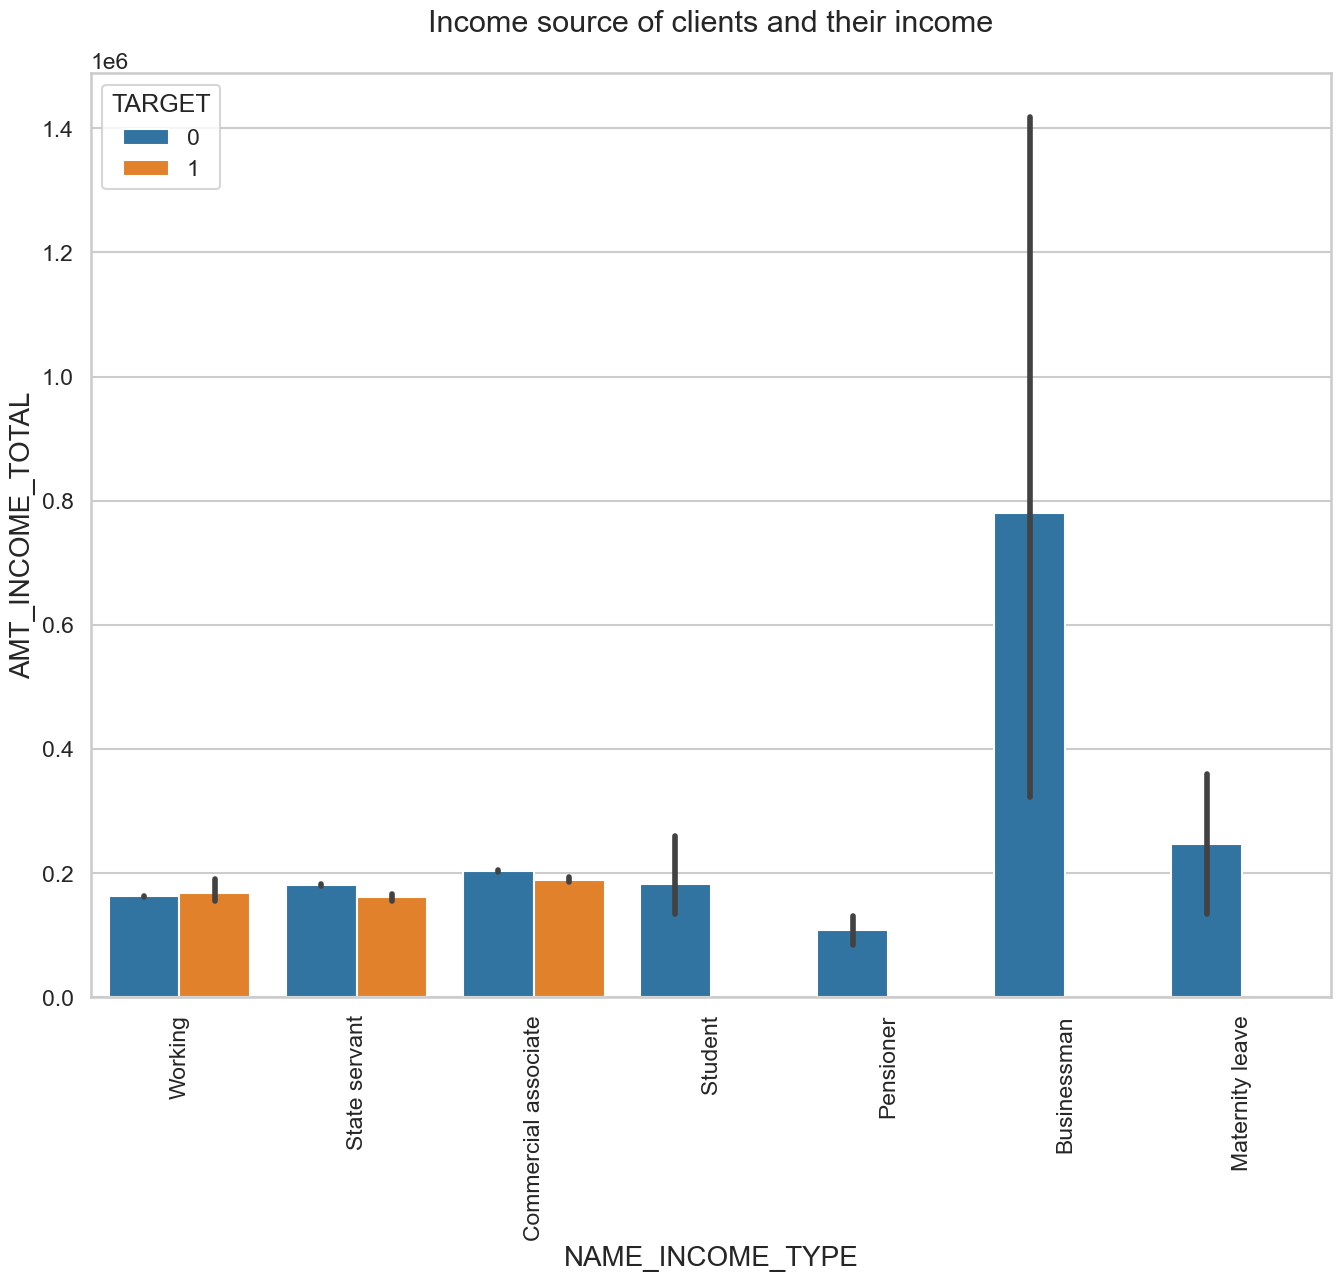

In [65]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=90)
sns.barplot(data =df, y='AMT_INCOME_TOTAL',hue='TARGET',x='NAME_INCOME_TYPE')
plt.title('Income source of clients and their income')
plt.show()

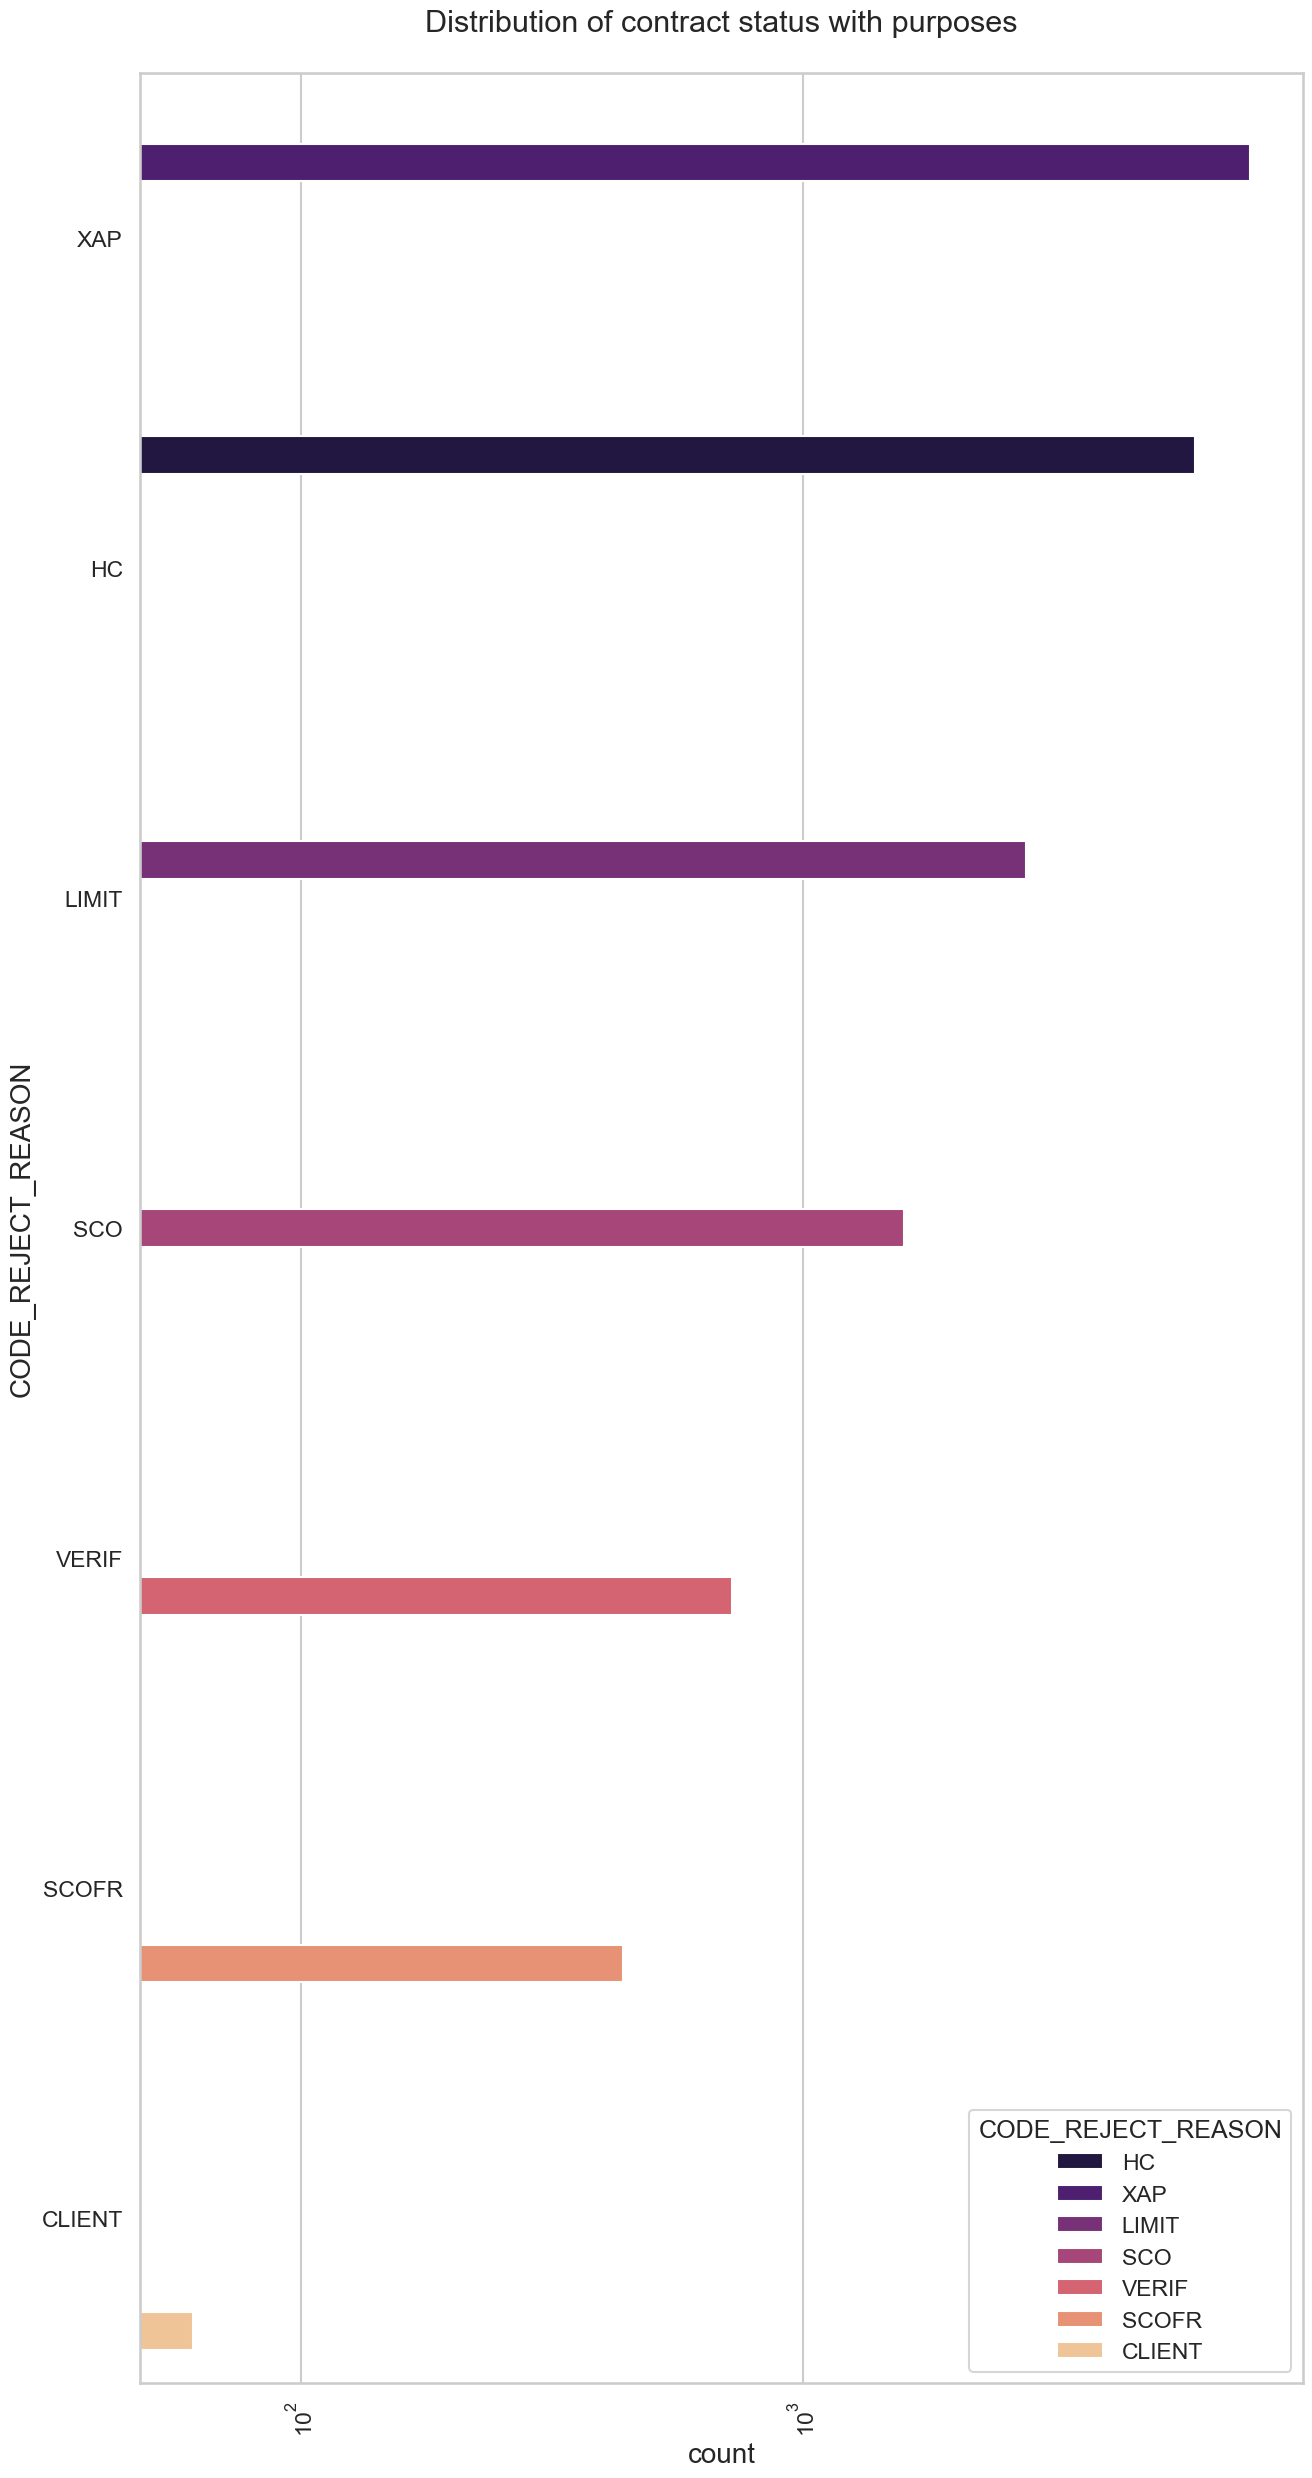

In [66]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = new_df1, y= 'CODE_REJECT_REASON', 
                   order=new_df1['CODE_REJECT_REASON'].value_counts().index,hue = 'CODE_REJECT_REASON',palette='magma') 

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

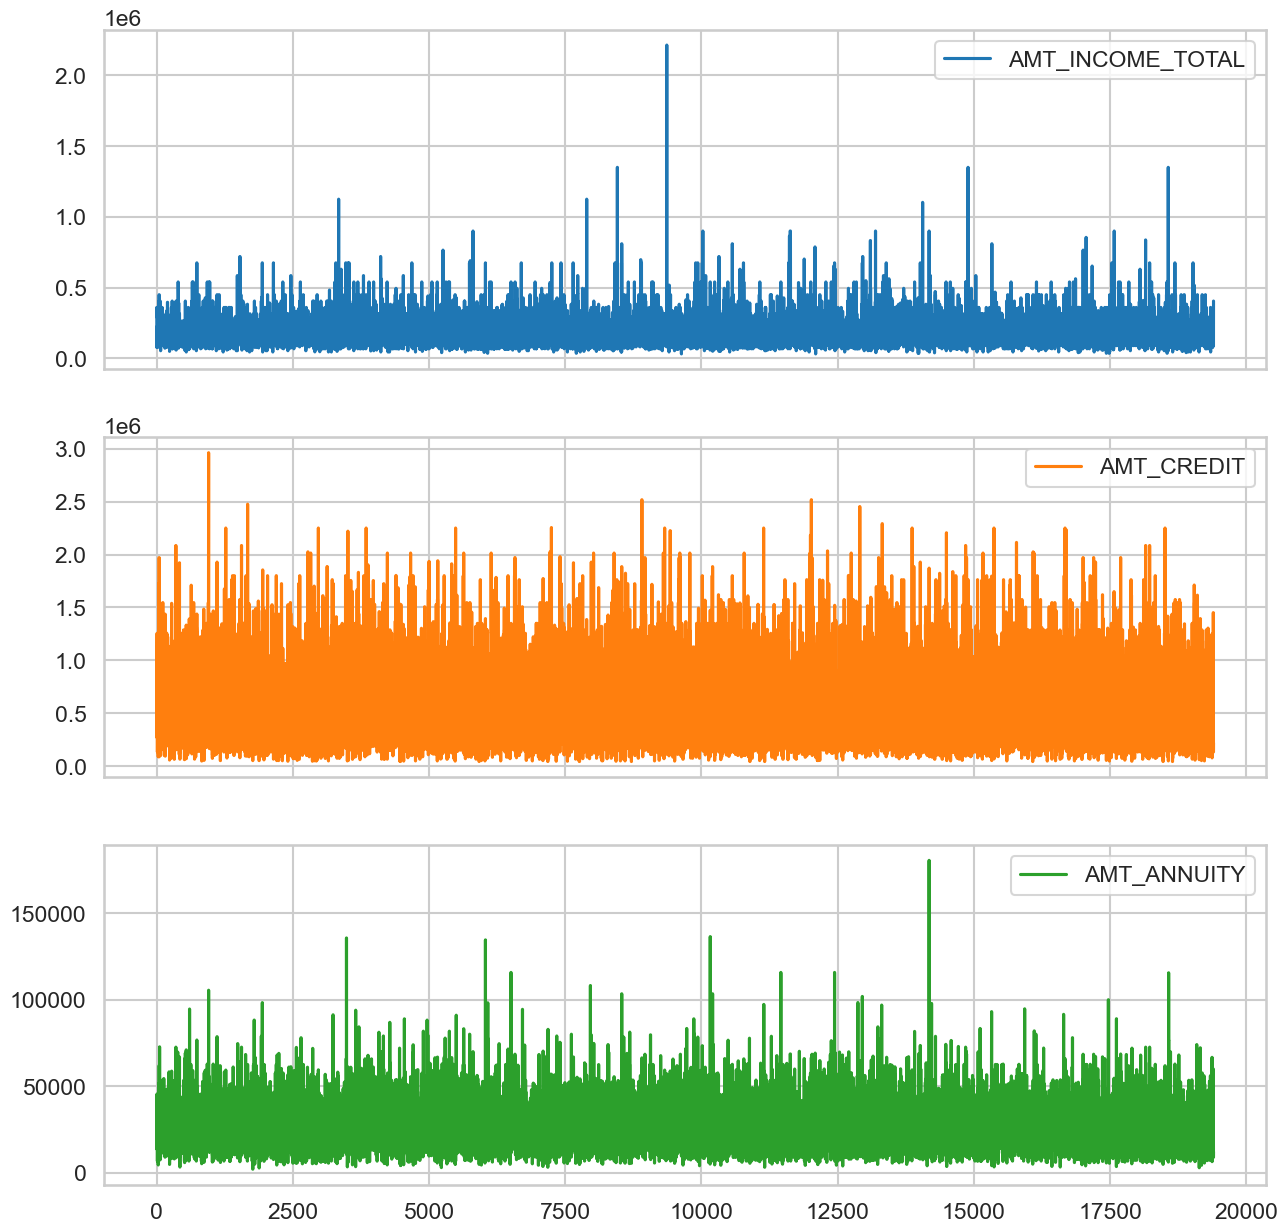

In [67]:
#new_df1.plot()
#new_df.plot()
#new_df1.plot.bar()
#new_df1.plot.bar(stacked=True)
#from pandas.plotting import andrews_curves
#data = new_df1
#plt.figure()
#andrews_curves(data,'CODE_REJECT_REASON')
mydf.plot(subplots=True, figsize=(15, 15))


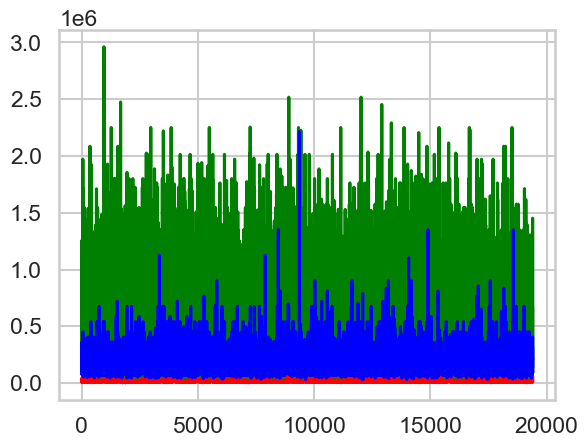

In [68]:
plt.figure()

with pd.plotting.plot_params.use("x_compat", True):

    new_df1["AMT_ANNUITY"].plot(color="r")

    new_df1["AMT_CREDIT"].plot(color="g")

    new_df1["AMT_INCOME_TOTAL"].plot(color="b")
    #new_df1['DAYS_DECISION'].plot(color='r')


In [69]:
#df.iloc[df1]
#df1.sum
#new_df.sum
df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
4,1784265,202054,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
5,1383531,199383,Cash loans,315000.0,340573.5,SATURDAY,8,Y,1,Everyday expenses,...,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,low_normal
51,2664403,163660,Cash loans,67500.0,82611.0,SATURDAY,10,Y,1,Car repairs,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
85,1981960,306707,Cash loans,225000.0,269550.0,WEDNESDAY,11,Y,1,Building a house or an annex,...,Cash through the bank,SCOFR,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
172,1382147,336630,Cash loans,112500.0,127350.0,MONDAY,13,Y,1,Other,...,Cash through the bank,XAP,Repeater,XNA,Cash,walk-in,AP+ (Cash loan),4,XNA,high


In [70]:
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [71]:
df.head()
#df.drop(['CNT_CHILDREN','REG_REGION_NOT_LIVE_IN_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY'],axis=1, inplace=True)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,10,0,0,0,0,0,0,Business Entity Type 3,200000-225000,400000-450000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,11,0,0,0,0,0,0,School,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,9,0,0,0,0,0,0,Government,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,17,0,0,0,0,0,0,Business Entity Type 3,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,11,0,0,0,0,1,1,Religion,100000-125000,500000-550000


In [72]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
206073,338865,0,Cash loans,F,N,Y,0,247500.0,457717.5,36162.0,...,15,0,0,0,0,1,1,Self-employed,225000-250000,450000-500000
206074,338866,0,Cash loans,M,Y,N,1,315000.0,808650.0,26086.5,...,8,0,0,0,0,0,0,Security Ministries,300000-325000,800000-850000
206075,338867,0,Cash loans,M,Y,N,0,202500.0,1125000.0,43722.0,...,18,0,0,0,0,0,0,Business Entity Type 3,200000-225000,900000 and above
206077,338869,0,Cash loans,F,N,Y,0,225000.0,954864.0,28048.5,...,11,0,0,0,0,0,0,Other,200000-225000,900000 and above
206078,338870,0,Cash loans,F,N,Y,1,360000.0,263686.5,15268.5,...,16,0,0,0,0,0,0,Government,350000-375000,250000-300000


In [73]:
df.tail(2400)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
203182,335554,0,Revolving loans,M,N,Y,0,180000.0,405000.0,20250.0,...,9,0,0,0,0,0,0,Housing,175000-200000,400000-450000
203183,335555,1,Cash loans,F,N,Y,2,99000.0,539590.5,26244.0,...,15,1,1,0,1,1,0,Business Entity Type 3,"75000,100000",500000-550000
203184,335556,0,Revolving loans,F,N,N,0,135000.0,180000.0,9000.0,...,9,0,0,0,1,1,0,Business Entity Type 3,125000-150000,150000-200000
203187,335559,0,Revolving loans,F,N,Y,0,157500.0,450000.0,22500.0,...,10,0,0,0,0,0,0,Business Entity Type 3,150000-175000,400000-450000
203188,335560,0,Cash loans,F,Y,N,0,320400.0,1762110.0,46611.0,...,3,0,0,0,0,0,0,Business Entity Type 3,300000-325000,900000 and above
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206073,338865,0,Cash loans,F,N,Y,0,247500.0,457717.5,36162.0,...,15,0,0,0,0,1,1,Self-employed,225000-250000,450000-500000
206074,338866,0,Cash loans,M,Y,N,1,315000.0,808650.0,26086.5,...,8,0,0,0,0,0,0,Security Ministries,300000-325000,800000-850000
206075,338867,0,Cash loans,M,Y,N,0,202500.0,1125000.0,43722.0,...,18,0,0,0,0,0,0,Business Entity Type 3,200000-225000,900000 and above
206077,338869,0,Cash loans,F,N,Y,0,225000.0,954864.0,28048.5,...,11,0,0,0,0,0,0,Other,200000-225000,900000 and above


In [74]:
new_df.corr()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,SK_ID_PREV,AMT_APPLICATION,AMT_CREDITx,HOUR_APPR_PROCESS_STARTx,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA
SK_ID_CURR,1.000000,-0.006176,-0.002986,0.006901,-0.009006,-0.003624,0.001668,-0.011433,-0.006863,0.005848,...,-0.012176,-0.006088,0.004099,0.005869,0.002212,0.003002,0.007376,-0.005259,-0.011264,0.007134
TARGET,-0.006176,1.000000,-0.001557,-0.008897,-0.023428,-0.000278,-0.048807,0.040274,0.068810,0.033549,...,0.037745,0.042603,0.024192,-0.007387,-0.032719,-0.026695,-0.039498,0.005803,0.055915,0.017048
CNT_CHILDREN,-0.002986,-0.001557,1.000000,-0.007821,-0.021756,0.004340,-0.020899,0.295268,0.097078,0.176208,...,0.010437,0.034880,0.037735,-0.003629,0.005193,0.007621,-0.033646,0.008338,0.057136,0.009721
AMT_INCOME_TOTAL,0.006901,-0.008897,-0.007821,1.000000,0.359954,0.435936,0.196063,-0.068764,-0.043913,0.016475,...,-0.008969,-0.036981,-0.032005,-0.004724,0.302132,0.296406,0.080541,-0.002652,-0.052529,-0.015012
AMT_CREDIT_,-0.009006,-0.023428,-0.021756,0.359954,1.000000,0.733879,0.100702,-0.132433,-0.085940,-0.029318,...,-0.034762,-0.052375,-0.039358,0.012609,0.229241,0.225370,0.047743,0.013895,-0.104419,-0.004285
AMT_ANNUITY,-0.003624,-0.000278,0.004340,0.435936,0.733879,1.000000,0.110835,-0.053953,-0.023644,0.019867,...,-0.028569,-0.043957,-0.032745,0.017420,0.196491,0.193937,0.039002,0.011500,-0.092119,-0.010214
REGION_POPULATION_RELATIVE,0.001668,-0.048807,-0.020899,0.196063,0.100702,0.110835,1.000000,-0.067248,-0.025292,-0.062880,...,-0.064424,-0.060055,-0.024486,0.009953,0.058693,0.057959,0.167942,-0.014472,-0.103394,-0.018892
DAYS_BIRTH,-0.011433,0.040274,0.295268,-0.068764,-0.132433,-0.053953,-0.067248,1.000000,0.324938,0.285746,...,0.154700,0.102546,0.024325,0.000205,-0.003999,-0.002640,0.031319,0.012358,0.122442,0.013045
DAYS_EMPLOYED,-0.006863,0.068810,0.097078,-0.043913,-0.085940,-0.023644,-0.025292,0.324938,1.000000,0.175661,...,0.105594,0.122023,0.073368,-0.000411,-0.015144,-0.012858,0.008579,-0.002543,0.096223,0.007441
DAYS_REGISTRATION,0.005848,0.033549,0.176208,0.016475,-0.029318,0.019867,-0.062880,0.285746,0.175661,1.000000,...,0.047230,0.052724,0.030577,-0.004576,0.057025,0.059256,-0.047072,0.002179,0.064510,0.008484


In [75]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [76]:
mydf5=new_df[['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_APPLICATION','AMT_CREDITx','TARGET']]
mydf5.tail()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITx,TARGET
19397,157500.0,60012.0,450000.0,491580.0,0
19398,90000.0,8919.0,229500.0,262224.0,0
19399,90000.0,8919.0,162000.0,183384.0,0
19400,90000.0,8919.0,171000.0,205267.5,0
19401,405000.0,12118.5,1350000.0,1506816.0,0


In [77]:
TARGET_dummy=pd.get_dummies(mydf5['TARGET'],drop_first =True)
TARGET_dummy.head()
mydf5.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITx,TARGET
0,292500.0,24592.5,1260000.0,1260000.0,0
1,360000.0,39069.0,1350000.0,1487214.0,0
2,180000.0,27000.0,337500.0,407911.5,0
3,76500.0,14661.0,180000.0,180000.0,0
4,180000.0,45558.0,202500.0,247837.5,0


In [79]:
mydf= mydf5.drop('TARGET',axis=1)
df4=pd.concat([mydf,TARGET_dummy],axis=1)
df4.head()

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITx,1
0,292500.0,24592.5,1260000.0,1260000.0,0
1,360000.0,39069.0,1350000.0,1487214.0,0
2,180000.0,27000.0,337500.0,407911.5,0
3,76500.0,14661.0,180000.0,180000.0,0
4,180000.0,45558.0,202500.0,247837.5,0


In [80]:
x_train, x_test, y_train, y_test= train_test_split(df4.drop('AMT_INCOME_TOTAL',axis=1),df4['AMT_INCOME_TOTAL'],test_size=0.25)

In [90]:
x_train= sm.add_constant(x_train,prepend=False)
x_train.head()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDITx,1,const
3552,20367.0,45000.0,46485.0,0,1.0
9156,24822.0,225000.0,275373.0,1,1.0
2371,29340.0,675000.0,808650.0,0,1.0
1910,31153.5,337500.0,353092.5,0,1.0
17056,30208.5,337500.0,360891.0,0,1.0


In [86]:
mod1=sm.OLS(y_train,x_train).fit()
print(mod1.summary())

                            OLS Regression Results                            
Dep. Variable:       AMT_INCOME_TOTAL   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     1181.
Date:                Sun, 02 Jul 2023   Prob (F-statistic):               0.00
Time:                        14:52:23   Log-Likelihood:            -1.8580e+05
No. Observations:               14551   AIC:                         3.716e+05
Df Residuals:                   14546   BIC:                         3.716e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
AMT_ANNUITY         2.8486      0.053     

In [162]:
#df.head()
#df1.head()
#new_df.corr()
new_df.head()
#df1.corr()
#df.corr()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY,...,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP
0,100035,0,Cash loans,F,N,Y,0,292500.0,665892.0,24592.5,...,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_action
1,100039,0,Cash loans,M,Y,N,1,360000.0,733315.5,39069.0,...,Cash through the bank,XAP,Refreshed,XNA,Cash,walk-in,Channel of corporate sales,-1,XNA,low_normal
2,100046,0,Revolving loans,M,Y,Y,0,180000.0,540000.0,27000.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,low_normal
3,100060,0,Cash loans,M,Y,N,0,76500.0,454500.0,14661.0,...,Cash through the bank,XAP,New,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high
4,100063,0,Cash loans,F,N,Y,0,180000.0,837427.5,45558.0,...,Cash through the bank,LIMIT,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high


In [192]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

var=new_df[['AMT_CREDIT_','AMT_INCOME_TOTAL','FLAG_OWN_REALTY','FLAG_OWN_CAR','CNT_CHILDREN','NAME_PAYMENT_TYPE']]
var.head()


,AMT_CREDIT_,AMT_INCOME_TOTAL,FLAG_OWN_REALTY,FLAG_OWN_CAR,CNT_CHILDREN,NAME_PAYMENT_TYPE
0,665892.0,292500.0,Y,N,0,Cash through the bank
1,733315.5,360000.0,N,Y,1,Cash through the bank
2,540000.0,180000.0,Y,Y,0,Cash through the bank
3,454500.0,76500.0,N,Y,0,Cash through the bank
4,837427.5,180000.0,Y,N,0,Cash through the bank


In [213]:
#dummy=pd.get_dummies(var['NAME_PAYMENT_TYPE'],drop_first =True)
#dummy.head()
#var1=var.drop('NAME_PAYMENT_TYPE',axis=1)
#var1.head()
#var=pd.concat([var1,dummy],axis=1)
#var
#x_train, x_test, y_train, y_test= train_test_split(var.drop('FLAG_OWN_REALTY',axis=1),var['FLAG_OWN_REALTY'],
#test_size=0.25)
#x_train=sm.add_constant(x_train,prepend=False)
#mod1=sm.MNLogit(y_train,x_train).fit()
y_train.head()


12061    Y
17516    Y
9478     N
15508    N
3346     Y
Name: FLAG_OWN_REALTY, dtype: object

In [215]:
#x_train, x_test, y_train, y_test= train_test_split(df8.drop('Y', axis=1),df8['Y'],test_size=0.25)
#x_train.head()
#x_train=sm.add_constant(x_train,prepend=False)
#y_test.head()
#x_train.head()
#y_train.head()
#mod1=sm.Logit(y_train,x_train).fit()
#mod1=sm.OLS(y_train,x_train).fit()
#mod1=sm.MNLogit(y_train,x_train).fit()
x_train.head()

,AMT_CREDIT_,AMT_INCOME_TOTAL,FLAG_OWN_CAR,CNT_CHILDREN,Cashless from the account of the employer,Non-cash from your account,const
12061,485640.0,225000.0,Y,1,0,0,1.0
17516,333337.5,157500.0,N,0,0,0,1.0
9478,701730.0,225000.0,N,0,0,0,1.0
15508,837000.0,112500.0,Y,0,0,0,1.0
3346,305640.0,135000.0,N,0,0,0,1.0


In [216]:
x_test.head()

,AMT_CREDIT_,AMT_INCOME_TOTAL,FLAG_OWN_CAR,CNT_CHILDREN,Cashless from the account of the employer,Non-cash from your account
665,1006920.0,135000.0,Y,2,0,0
15232,292563.0,180000.0,N,1,0,0
327,808650.0,202500.0,N,1,0,0
9466,835506.0,135000.0,N,0,0,0
3463,519633.0,247500.0,Y,0,0,0


In [217]:
y_test.head()

665      N
15232    Y
327      Y
9466     Y
3463     Y
Name: FLAG_OWN_REALTY, dtype: object

In [2]:
import numpy as np
import pandas as pd
import statsmodels
import sklearn
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
import seaborn as sns

sns.pairplot(var)

NameError: name 'var' is not defined